# Phân bổ Quỹ cho các quốc gia


### Chi tiết bài toán:

Phân nhóm các quốc gia bằng các yếu tố kinh tế xã hội và sức khỏe, tùy thuộc vào điều kiện của môỗ quốc gia, các quỹ sẽ được phân bổ để hỗ trợ trong thời gian xảy ra thiên tai và thảm họa.

### Mô tả dataset
    
- **country** : Tên quôc gia
- **child_mort** : Tỷ lệ tử vong dưới 5 tuổi mỗi 1000 sinh
- **exports** : Xuất khẩu hàng hóa và dịch vụ mỗi đầu người. % GDP bình quân mỗi đầu người
- **health** : Tổng chi phí y tế mỗi đầu người. % GDP bình quân mỗi đầu người
- **imports** : Nhập khẩu hàng hóa và dịch vụ mỗi đầu người. % GDP bình quân mỗi đầu người
- **Income** : Tổng thu nhập mỗi đầu người
- **Inflation** : Đo lường tỷ lệ tăng trưởng hàng năm của tổng GDP
- **life_expec** : Số năm trung bình mà một đứa trẻ mới sinh sẽ sống nếu các mẫu tử hiện tại tiếp tục
- **total_fer** : Số trẻ em sẽ được sinh ra cho mỗi phụ nữ nếu tỷ lệ tuổi thọ hiện tại tiếp tục
- **gdpp** : GDP mỗi đầu người. Tính bằng cách chia tổng GDP cho tổng dân số.

### Các bước thực hiện:
- Dataset Information
- Exploratory Data Analysis (EDA)
- Summary of EDA
- Feature Engineering
- Modeling
- Conclusion

### Kỹ thuật và thuật toán:
- Data Visualization techniques. 
- Feature Engineering & PCA.
- K-Means Clustering vs DBSCAN Clustering vs Hierarchical Clustering model performance.

# 1. Dataset Information

In [1]:
# !pip install plotly
# !pip install -U kaleido

### Import Libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

import plotly.express as px

import kaleido

In [3]:
data = pd.read_csv('./Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460
3,Angola,119.00,62.30,2.85,42.90,5900,22.40,60.10,6.16,3530
4,Antigua and Barbuda,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200


### Data Info :

In [4]:
data.shape

(167, 10)

In [5]:
data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

-> Khong co null value

In [8]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00
mean,38.27,41.11,6.82,46.89,17144.69,7.78,70.56,2.95,12964.16
std,40.33,27.41,2.75,24.21,19278.07,10.57,8.89,1.51,18328.70
min,2.60,0.11,1.81,0.07,609.00,-4.21,32.10,1.15,231.00
25%,8.25,23.80,4.92,30.20,3355.00,1.81,65.30,1.79,1330.00
50%,19.30,35.00,6.32,43.30,9960.00,5.39,73.10,2.41,4660.00
75%,62.10,51.35,8.60,58.75,22800.00,10.75,76.80,3.88,14050.00
max,208.00,200.00,17.90,174.00,125000.00,104.00,82.80,7.49,105000.00


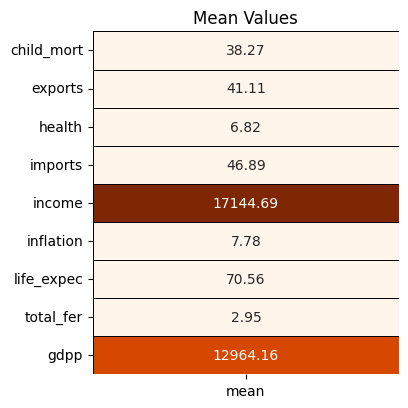

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

colors = ["#FF781F", "#2D2926"]
plt.subplot(1, 1, 1)
sns.heatmap(
    data.describe().T[["mean"]],
    cmap="Oranges",
    annot=True,
    fmt=".2f",
    linecolor="black",
    linewidths=0.4,
    cbar=False,
)
plt.title("Mean Values")

fig.tight_layout(pad=4)

# EDA: Exploratory Data Analysis

In [10]:
col = list(data.columns)
col.remove('country')
categorical_features = ['country']
numerical_features = [*col]
numerical_features_text = ', '.join(numerical_features)
print('Categorical Features :',*categorical_features)
print('Numerical Features :',numerical_features_text)

Categorical Features : country
Numerical Features : child_mort, exports, health, imports, income, inflation, life_expec, total_fer, gdpp


### Distribution of Features :

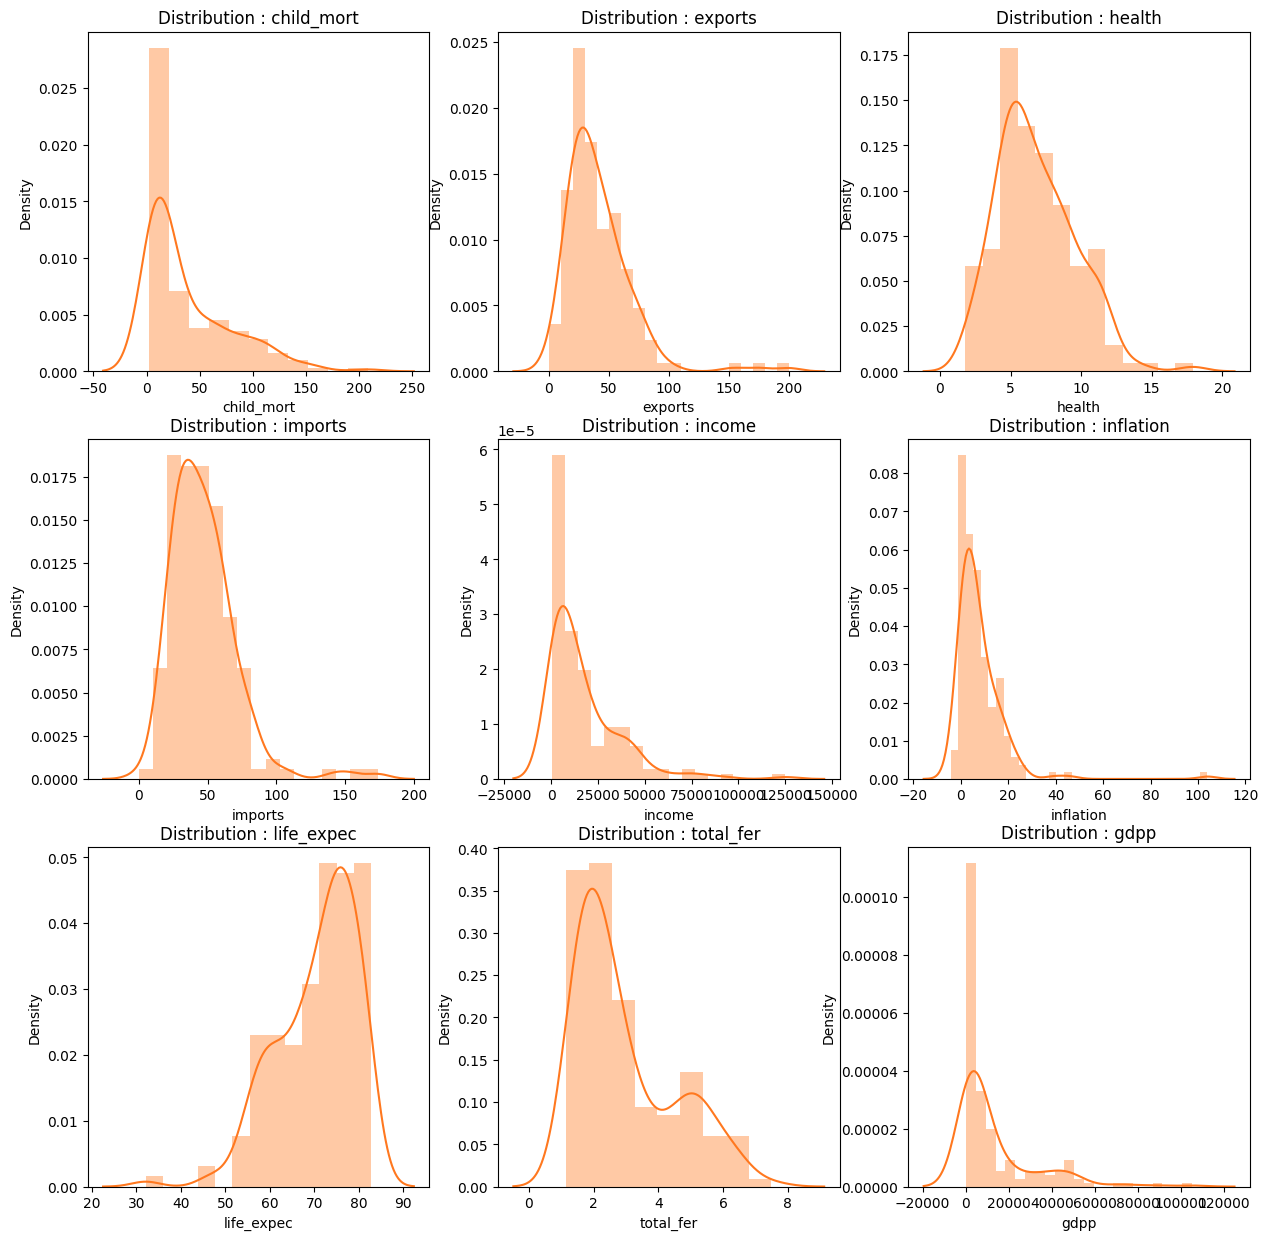

In [11]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
for i in range(len(numerical_features)):
    plt.subplot(3, 3, i + 1)
    sns.distplot(data[numerical_features[i]], color=colors[0])
    title = "Distribution : " + numerical_features[i]
    plt.title(title)
plt.show()

In [12]:
len(data['country'].unique()) == len(data)

True

- **life_expec** đều hiển thị một phân phối dữ liệu **negative skew**.
- **health** hiển thị một phân phối dữ liệu **normal**.
- Tất ca còn lại đều hiển thị một phân phối dữ liệu **positive skew**.
- Phân phối dữ liệu của **country** không được hiển thị vì nó chứa dữ liệu văn bản và có cùng số lượng giá trị duy nhất như độ dài của dataframe.

### Đặc điểm của các quốc:

- **Thu nhập bình quân đầu người của quốc gia rất thấp**.
- **Dân số cao** dẫn đến không có sẵn nguồn lực.
- **Thất nghiệp** do ít nguồn lực.
- **Sự giàu có của quốc gia thấp** dẫn đến **vốn thấp**.
- **Phân phối **của cải** và **thu nhập** không công bằng**.
- **Thiếu các tiện nghi giáo dục phù hợp** và do đó **mù chữ phổ biến**.
- **Mức sống thấp**.
- **Không có tiến bộ kỹ thuật**.
- **Dịch vụ y tế kém** cùng với **tỷ lệ sinh và tử cao**.


### Country vs Numerical Features : 

- **child_mort : Các quốc gia lạc hậu về kinh tế có tỷ lệ tử vong ở trẻ sơ sinh cao!**

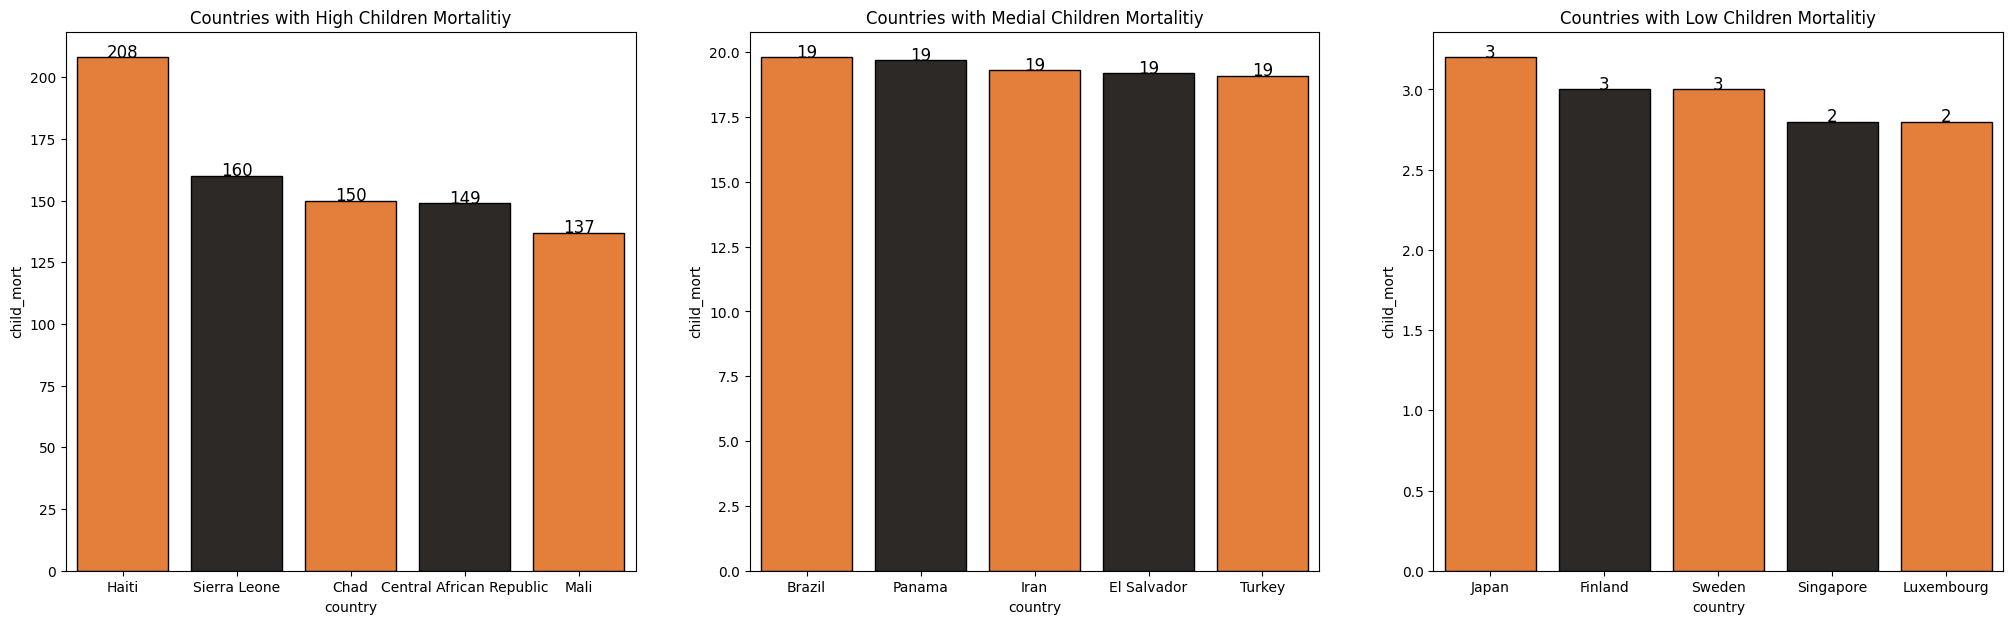

In [13]:
fig = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))
plt.subplot(1, 3, 1)
ax = sns.barplot(
    x="country",
    y="child_mort",
    data=data.sort_values(ascending=False, by="child_mort").iloc[:5],
    palette=colors,
    edgecolor="black",
)
plt.title("Countries with High Children Mortalitiy")
for rect in ax.patches:
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height(),
        int(rect.get_height()),
        horizontalalignment="center",
        fontsize=12,
    )

plt.subplot(1, 3, 2)
ax = sns.barplot(
    x="country",
    y="child_mort",
    data=data.sort_values(ascending=False, by="child_mort").iloc[81:86],
    palette=colors,
    edgecolor="black",
)
plt.title("Countries with Medial Children Mortalitiy")
for rect in ax.patches:
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height(),
        int(rect.get_height()),
        horizontalalignment="center",
        fontsize=12,
    )

plt.subplot(1, 3, 3)
ax = sns.barplot(
    x="country",
    y="child_mort",
    data=data.sort_values(ascending=False, by="child_mort").iloc[161:166],
    palette=colors,
    edgecolor="black",
)
plt.title("Countries with Low Children Mortalitiy")
for rect in ax.patches:
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height(),
        int(rect.get_height()),
        horizontalalignment="center",
        fontsize=12,
    )
plt.show()

- **Haiti** có tỷ lệ tử vong ở trẻ em cao nhất. **Các quốc gia châu Phi** có vị trí quan trọng.
- các quốc gia từ **Châu Á và Châu Âu** có một số sự hiện diện vững chắc.

- **exports : Yếu tố rất quan trọng để xây dựng nền kinh tế quốc gia. Xuất khẩu của một quốc gia càng cao, nền kinh tế quốc gia càng mạnh và của cải do quốc gia tạo ra càng nhiều**

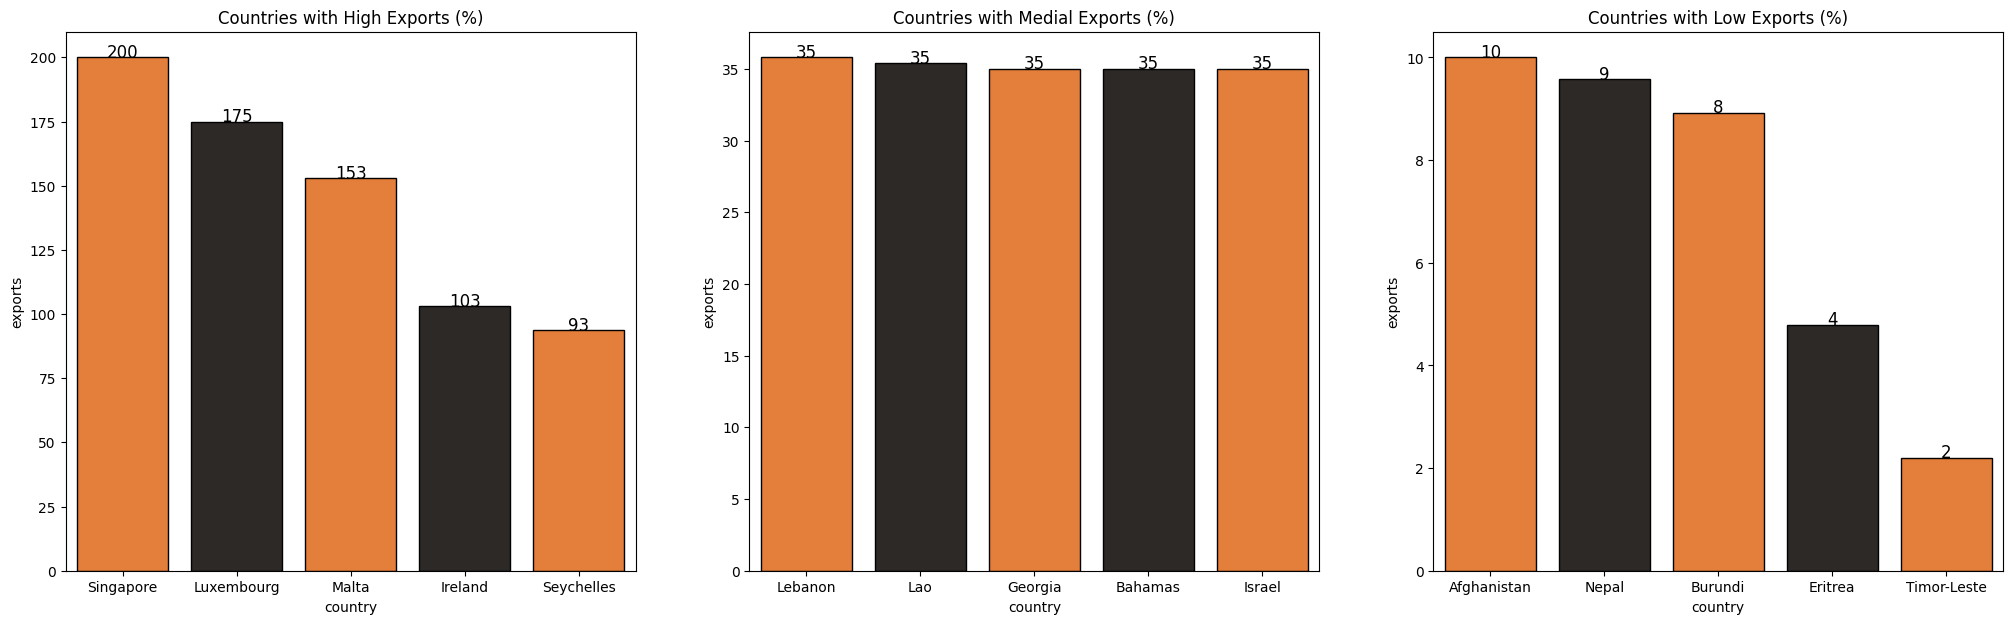

In [14]:
fig = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))
plt.subplot(1, 3, 1)
ax = sns.barplot(
    x="country",
    y="exports",
    data=data.sort_values(ascending=False, by="exports").iloc[:5],
    palette=colors,
    edgecolor="black",
)
plt.title("Countries with High Exports (%)")
for rect in ax.patches:
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height(),
        int(rect.get_height()),
        horizontalalignment="center",
        fontsize=12,
    )

plt.subplot(1, 3, 2)
ax = sns.barplot(
    x="country",
    y="exports",
    data=data.sort_values(ascending=False, by="exports").iloc[81:86],
    palette=colors,
    edgecolor="black",
)
plt.title("Countries with Medial Exports (%)")
for rect in ax.patches:
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height(),
        int(rect.get_height()),
        horizontalalignment="center",
        fontsize=12,
    )

plt.subplot(1, 3, 3)
ax = sns.barplot(
    x="country",
    y="exports",
    data=data.sort_values(ascending=False, by="exports").iloc[161:166],
    palette=colors,
    edgecolor="black",
)
plt.title("Countries with Low Exports (%)")
for rect in ax.patches:
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height(),
        int(rect.get_height()),
        horizontalalignment="center",
        fontsize=12,
    )
plt.show()

- **exports** của một quốc gia thường là hàng hóa và dịch vụ được tạo ra trong nước nhưng được bán cho các quốc gia khác. Hàng hóa và dịch vụ exports phụ thuộc vào các yếu tố như vị trí địa lý, tài nguyên thiên nhiên, quy mô dân số và sở thích của họ đối với các kỹ năng cụ thể, v.v.
- Quy mô dân số **Singapore** không nằm trong top 100, nhưng họ có số lượng **exports** cao nhất. **Luxembourg** và **Malta** có lẽ cũng đi theo con đường tương tự.
- **Afghanistan** và **Nepal** nằm ở mức **exports** thấp hơn. Vị trí địa lý của các quốc gia này có ảnh hưởng lớn. Các quốc gia có lượng exports thấp hơn cũng có diện tích địa lý nhỏ.

- **health : Người dân các nước phát triển có thu nhập cao hơn nên họ không gặp vấn đề gì khi chi tiêu nhiều hơn cho lối sống lành mạnh**

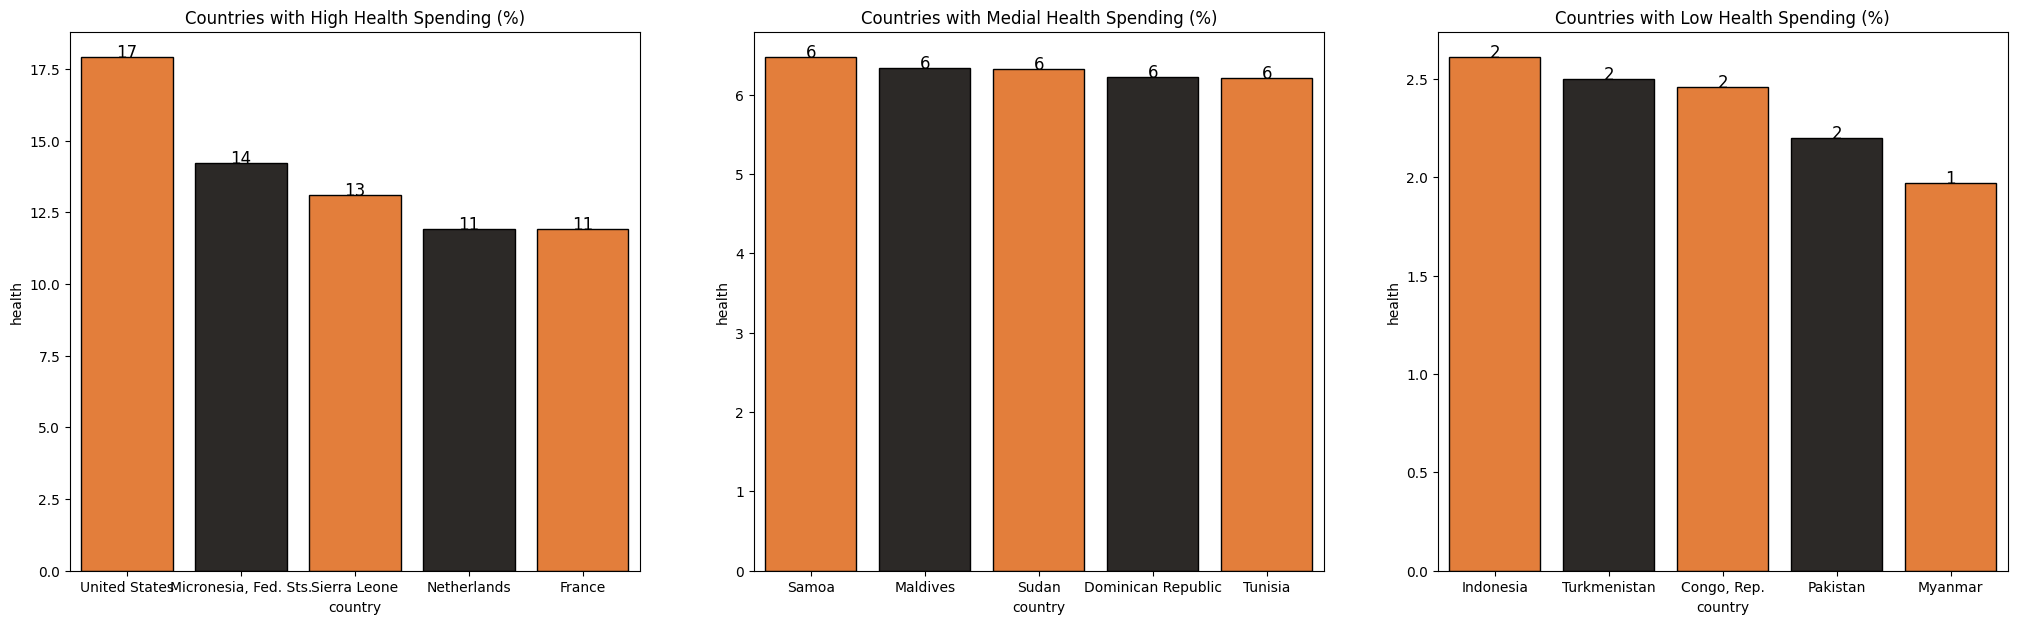

In [15]:
fig = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))
plt.subplot(1, 3, 1)
ax = sns.barplot(
    x="country",
    y="health",
    data=data.sort_values(ascending=False, by="health").iloc[:5],
    palette=colors,
    edgecolor="black",
)
plt.title("Countries with High Health Spending (%)")
for rect in ax.patches:
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height(),
        int(rect.get_height()),
        horizontalalignment="center",
        fontsize=12,
    )

plt.subplot(1, 3, 2)
ax = sns.barplot(
    x="country",
    y="health",
    data=data.sort_values(ascending=False, by="health").iloc[81:86],
    palette=colors,
    edgecolor="black",
)
plt.title("Countries with Medial Health Spending (%)")
for rect in ax.patches:
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height(),
        int(rect.get_height()),
        horizontalalignment="center",
        fontsize=12,
    )

plt.subplot(1, 3, 3)
ax = sns.barplot(
    x="country",
    y="health",
    data=data.sort_values(ascending=False, by="health").iloc[161:166],
    palette=colors,
    edgecolor="black",
)
plt.title("Countries with Low Health Spending (%)")
for rect in ax.patches:
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height(),
        int(rect.get_height()),
        horizontalalignment="center",
        fontsize=12,
    )
plt.show()

- **Hoa Kỳ** đứng đầu khi nói đến chi tiêu cho health với **17%** đóng góp vào GDP cá nhân.
- **6%** có vẻ là giá trị trung bình của công dân chi tiêu cho **health** của họ.
- **Các quốc gia châu Á** thống trị mức chi tiêu thấp hơn của **health** với ít hơn **3%**.

- **imports : Đây là một thuộc tính khác quyết định sự phụ thuộc của các quốc gia vào các quốc gia khác về hàng hóa và dịch vụ**

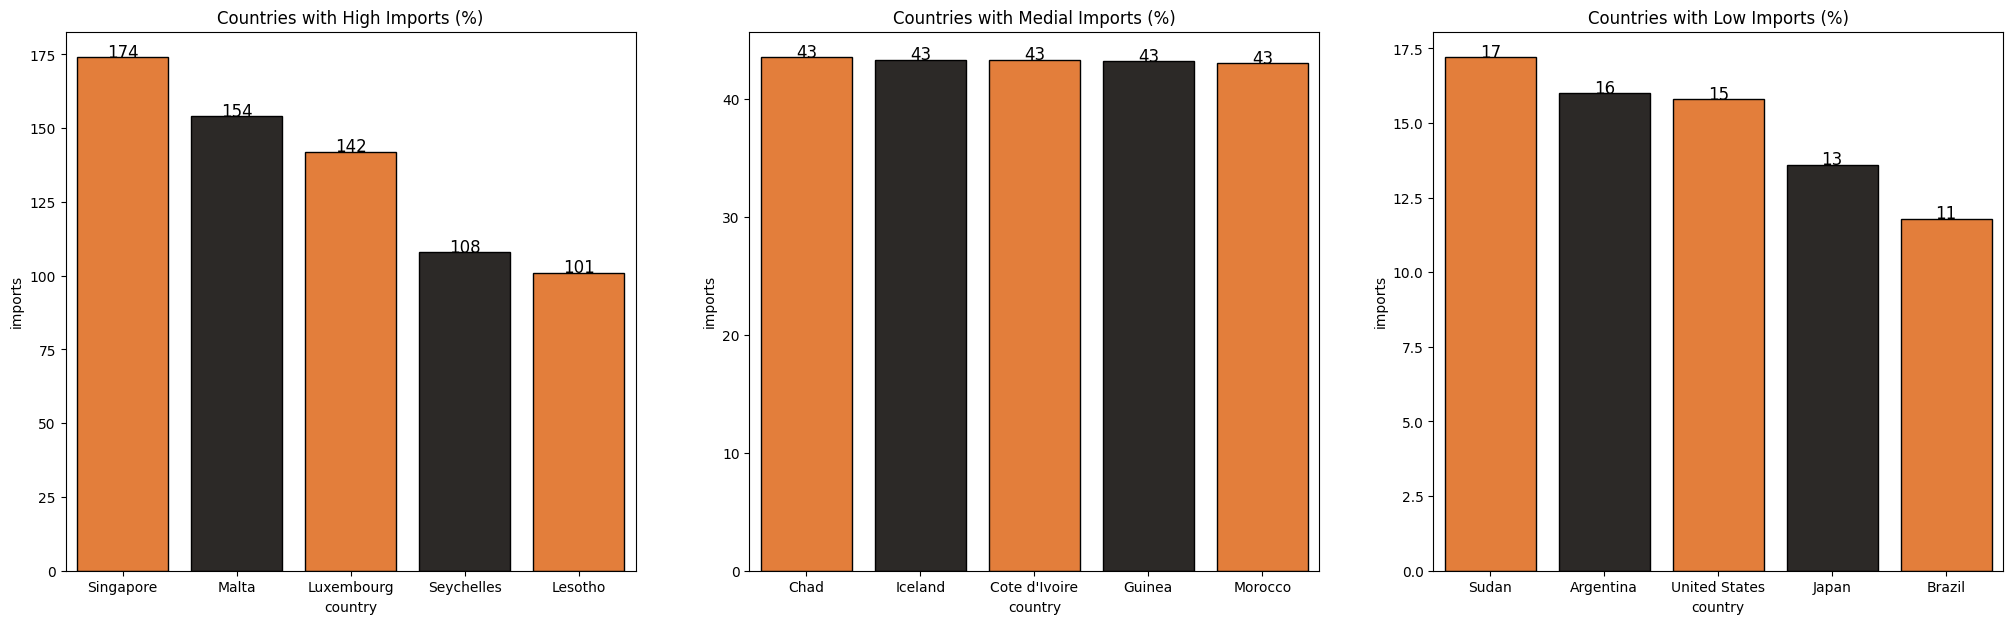

In [16]:
fig = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))
plt.subplot(1, 3, 1)
ax = sns.barplot(
    x="country",
    y="imports",
    data=data.sort_values(ascending=False, by="imports").iloc[:5],
    palette=colors,
    edgecolor="black",
)
plt.title("Countries with High Imports (%)")
for rect in ax.patches:
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height(),
        int(rect.get_height()),
        horizontalalignment="center",
        fontsize=12,
    )

plt.subplot(1, 3, 2)
ax = sns.barplot(
    x="country",
    y="imports",
    data=data.sort_values(ascending=False, by="imports").iloc[81:86],
    palette=colors,
    edgecolor="black",
)
plt.title("Countries with Medial Imports (%)")
for rect in ax.patches:
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height(),
        int(rect.get_height()),
        horizontalalignment="center",
        fontsize=12,
    )

plt.subplot(1, 3, 3)
ax = sns.barplot(
    x="country",
    y="imports",
    data=data.sort_values(ascending=False, by="imports").iloc[161:166],
    palette=colors,
    edgecolor="black",
)
plt.title("Countries with Low Imports (%)")
for rect in ax.patches:
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height(),
        int(rect.get_height()),
        horizontalalignment="center",
        fontsize=12,
    )
plt.show()

- Số liệu thống kê **import** của một quốc gia mô tả khả năng tự lực của quốc gia đó trong việc giải quyết các vấn đề của họ bất kể có bị hạn chế về một trong những nguồn tài nguyên thiết yếu hay không.
- **Singapore**, **Malta**, **Luxembourg** và **Seychelles** nằm trong top 5 **export** cũng như **import** -> các chiến lược của quốc gia này có thể là tận dụng các nguồn tài nguyên của họ và tạo ra **export** vững chắc bị phản đối bởi **import** lớn vào một thứ khác.
- **Brazil** có **import** thấp nhất trong số tất cả các quốc gia với **11%**. **Sudan** là quốc gia châu Phi duy nhất có mặt trong danh sách cuối cùng với **17%**.

- **income : Thu nhập bình quân đầu người là chỉ số quan trọng về tình hình kinh tế của đất nước. Thu nhập của người dân càng cao, họ càng có khả năng ứng phó với những tình huống bất định**

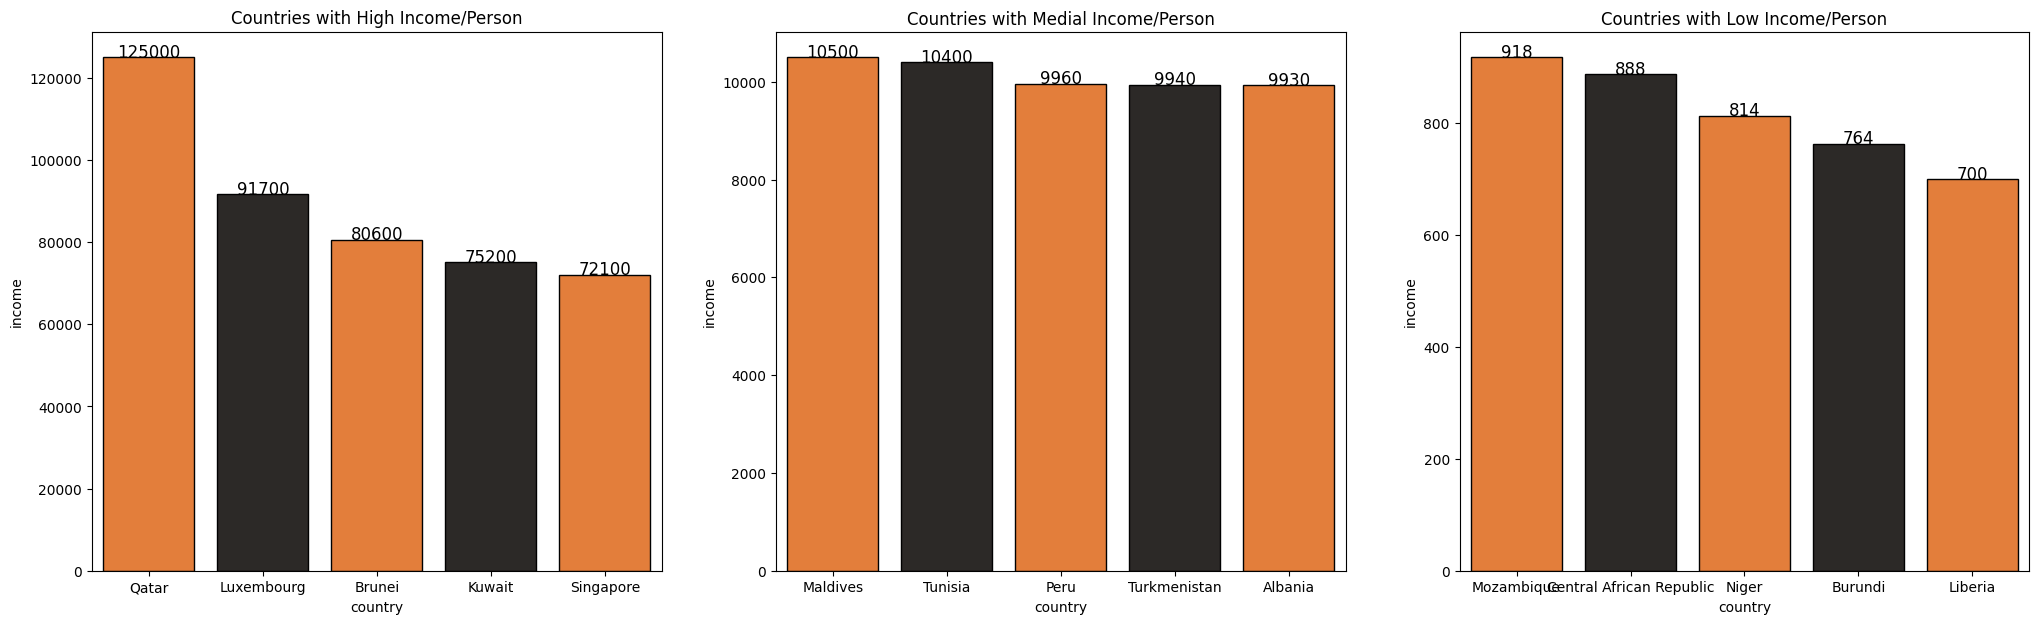

In [17]:
fig = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))
plt.subplot(1, 3, 1)
ax = sns.barplot(
    x="country",
    y="income",
    data=data.sort_values(ascending=False, by="income").iloc[:5],
    palette=colors,
    edgecolor="black",
)
plt.title("Countries with High Income/Person")
for rect in ax.patches:
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height(),
        int(rect.get_height()),
        horizontalalignment="center",
        fontsize=12,
    )

plt.subplot(1, 3, 2)
ax = sns.barplot(
    x="country",
    y="income",
    data=data.sort_values(ascending=False, by="income").iloc[81:86],
    palette=colors,
    edgecolor="black",
)
plt.title("Countries with Medial Income/Person")
for rect in ax.patches:
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height(),
        int(rect.get_height()),
        horizontalalignment="center",
        fontsize=12,
    )

plt.subplot(1, 3, 3)
ax = sns.barplot(
    x="country",
    y="income",
    data=data.sort_values(ascending=False, by="income").iloc[161:166],
    palette=colors,
    edgecolor="black",
)
plt.title("Countries with Low Income/Person")
for rect in ax.patches:
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height(),
        int(rect.get_height()),
        horizontalalignment="center",
        fontsize=12,
    )
plt.show()

- Công dân của **Qatar** có **income** cao nhất trong số tất cả các quốc gia với mức chênh lệch **30k** so với các quốc gia xếp thứ 2. **Singapore** và **Luxembourg** một lần nữa có mặt trong top 5 của một tính năng khác.
- Đầu dưới của **income** do các quốc gia **châu Phi** thống trị. Điều này bị ảnh hưởng bởi thiệt hại do quá trình thực dân hóa gây ra mà các quốc gia này vẫn chưa phục hồi.
- Sự chênh lệch về **income** của các quốc gia ở đầu trên, giữa và cuối khá đáng kể và sẽ ảnh hưởng đến mọi tính năng khác.

- **inflation : Nó quyết định tình trạng của nền kinh tế, sức mạnh của đồng tiền cũng như nhu cầu về hàng hóa và dịch vụ**

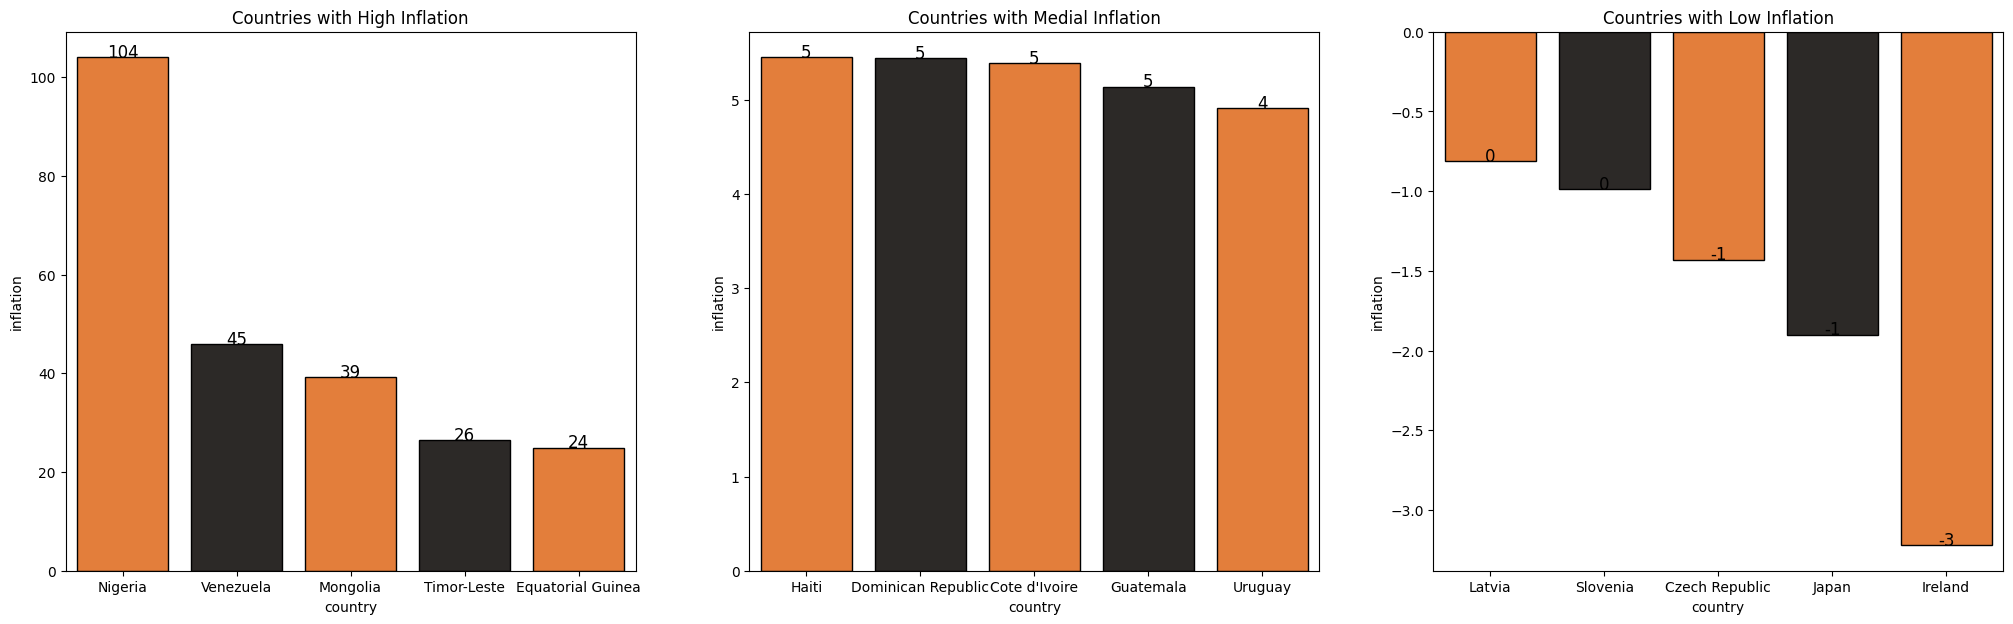

In [18]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'inflation', data = data.sort_values(ascending = False,by = 'inflation').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Inflation')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'inflation', data = data.sort_values(ascending = False,by = 'inflation').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Inflation')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'inflation', data = data.sort_values(ascending = False,by = 'inflation').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Inflation')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

- **inflation** cao hơn làm giảm sức mua của người dân. Các quốc gia có mức **inflation** cao nhất có tình hình kinh tế tàn khốc. Có mức inflation cao như vậy là rủi ro đối với sự tồn tại của quốc gia.
- Mức **inflation** thấp hơn có giá trị âm -> được gọi là giảm phát.

- **life_expec : Tuổi thọ cao hơn cho thấy người dân có các thuộc tính sức khỏe cả về thể chất lẫn tinh thần**

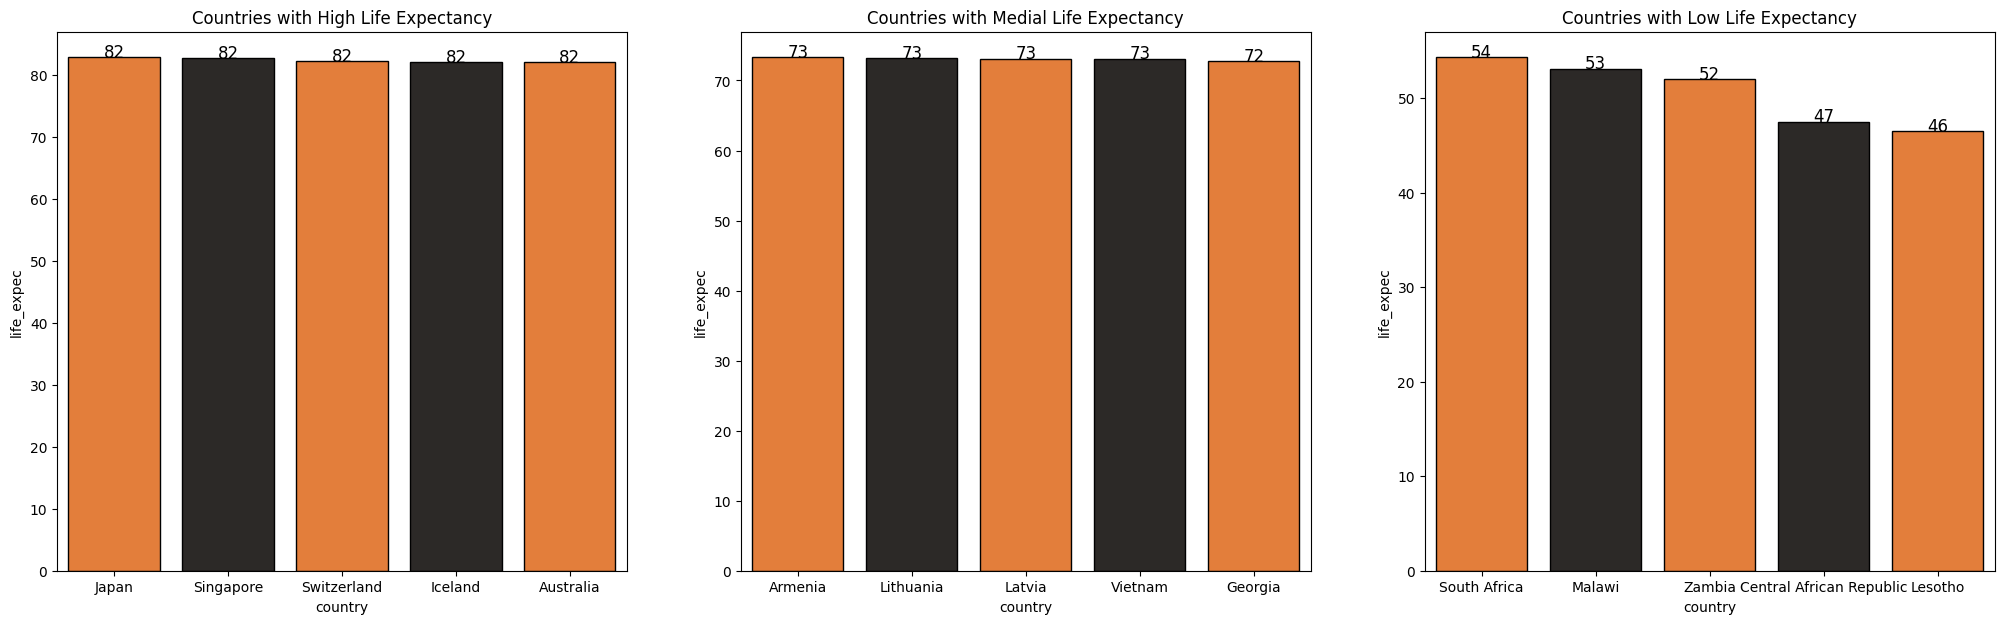

In [19]:
fig = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))
plt.subplot(1, 3, 1)
ax = sns.barplot(
    x="country",
    y="life_expec",
    data=data.sort_values(ascending=False, by="life_expec").iloc[:5],
    palette=colors,
    edgecolor="black",
)
plt.title("Countries with High Life Expectancy")
for rect in ax.patches:
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height(),
        int(rect.get_height()),
        horizontalalignment="center",
        fontsize=12,
    )

plt.subplot(1, 3, 2)
ax = sns.barplot(
    x="country",
    y="life_expec",
    data=data.sort_values(ascending=False, by="life_expec").iloc[81:86],
    palette=colors,
    edgecolor="black",
)
plt.title("Countries with Medial Life Expectancy")
for rect in ax.patches:
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height(),
        int(rect.get_height()),
        horizontalalignment="center",
        fontsize=12,
    )

plt.subplot(1, 3, 3)
ax = sns.barplot(
    x="country",
    y="life_expec",
    data=data.sort_values(ascending=False, by="life_expec").iloc[161:166],
    palette=colors,
    edgecolor="black",
)
plt.title("Countries with Low Life Expectancy")
for rect in ax.patches:
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height(),
        int(rect.get_height()),
        horizontalalignment="center",
        fontsize=12,
    )
plt.show()

- **life_expec** phụ thuộc rất nhiều vào trạng thái tinh thần cũng như lối sống của người dân. **Singapore** một lần nữa có mặt trong top 5 của một tính năng.
- Không có quốc gia nào có **life_expec** cao có mặt trong top 5 của **health** liên quan đến chi tiêu của người dân cho sức khỏe.
- **Các quốc gia châu Phi** một lần nữa có mặt ở vị trí thấp hơn trong một tính năng khác.

- **total_fer : Các quốc gia lạc hậu về kinh tế có tỷ lệ sinh cao**

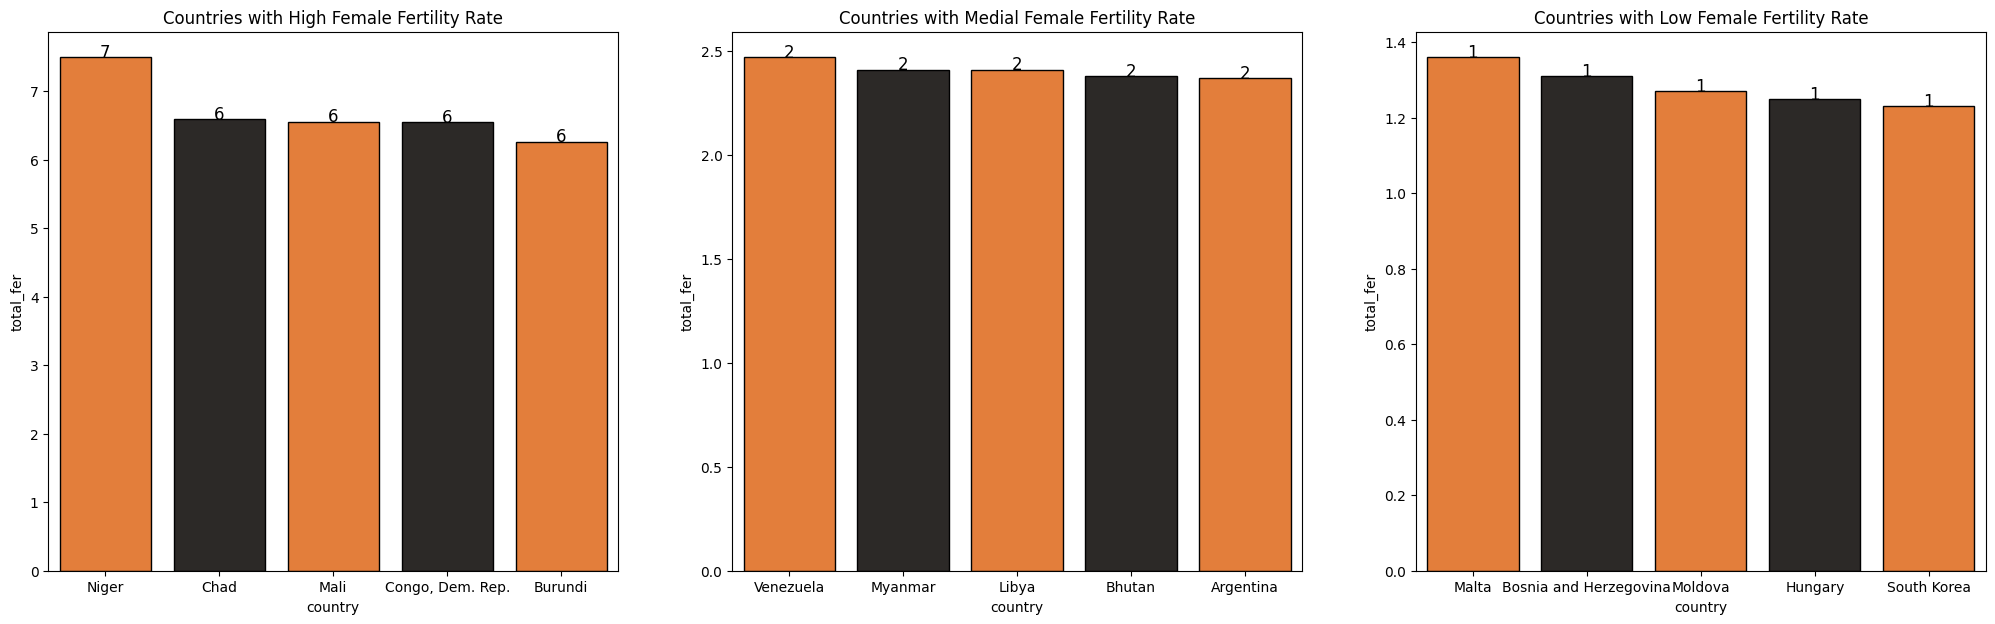

In [20]:
fig = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))
plt.subplot(1, 3, 1)
ax = sns.barplot(
    x="country",
    y="total_fer",
    data=data.sort_values(ascending=False, by="total_fer").iloc[:5],
    palette=colors,
    edgecolor="black",
)
plt.title("Countries with High Female Fertility Rate")
for rect in ax.patches:
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height(),
        int(rect.get_height()),
        horizontalalignment="center",
        fontsize=12,
    )

plt.subplot(1, 3, 2)
ax = sns.barplot(
    x="country",
    y="total_fer",
    data=data.sort_values(ascending=False, by="total_fer").iloc[81:86],
    palette=colors,
    edgecolor="black",
)
plt.title("Countries with Medial Female Fertility Rate")
for rect in ax.patches:
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height(),
        int(rect.get_height()),
        horizontalalignment="center",
        fontsize=12,
    )

plt.subplot(1, 3, 3)
ax = sns.barplot(
    x="country",
    y="total_fer",
    data=data.sort_values(ascending=False, by="total_fer").iloc[161:166],
    palette=colors,
    edgecolor="black",
)
plt.title("Countries with Low Female Fertility Rate")
for rect in ax.patches:
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height(),
        int(rect.get_height()),
        horizontalalignment="center",
        fontsize=12,
    )
plt.show()

- Các quốc gia **châu Phi** chiếm ưu thế trong **total_fer** với các giá trị **6+**.
- Giá trị **total_fer** trung bình là **2** trong khi các giá trị cuối thấp hơn là **1** cũng đáng quan tâm.

- **gdpp : Đây là tính năng cung cấp thông tin về đóng góp của công dân vào GDP của nước đó**

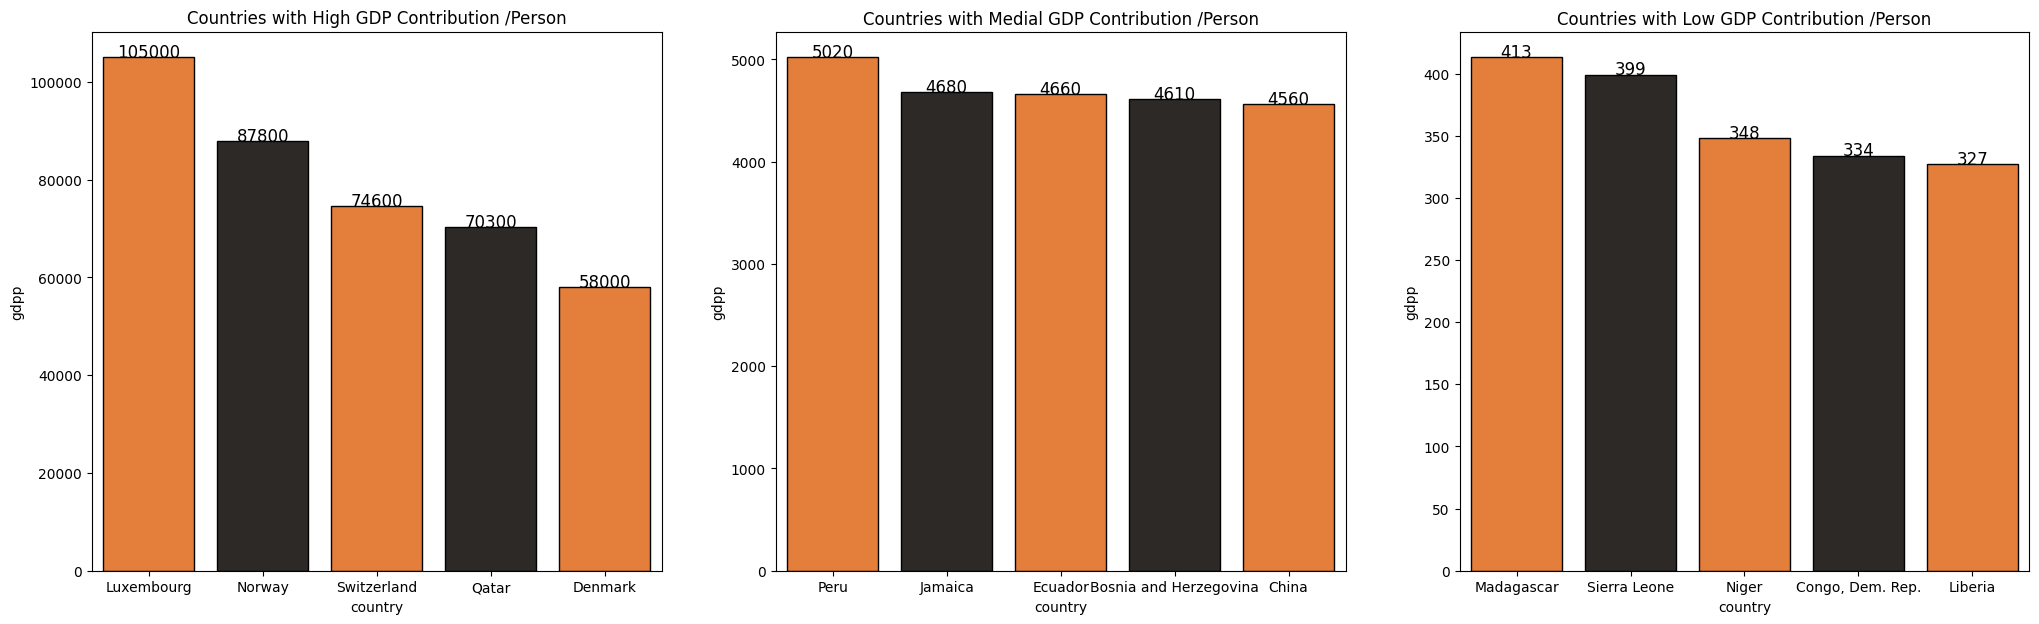

In [21]:
fig = plt.subplots(nrows=1, ncols=3, figsize=(25, 7))
plt.subplot(1, 3, 1)
ax = sns.barplot(
    x="country",
    y="gdpp",
    data=data.sort_values(ascending=False, by="gdpp").iloc[:5],
    palette=colors,
    edgecolor="black",
)
plt.title("Countries with High GDP Contribution /Person")
for rect in ax.patches:
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height(),
        int(rect.get_height()),
        horizontalalignment="center",
        fontsize=12,
    )

plt.subplot(1, 3, 2)
ax = sns.barplot(
    x="country",
    y="gdpp",
    data=data.sort_values(ascending=False, by="gdpp").iloc[81:86],
    palette=colors,
    edgecolor="black",
)
plt.title("Countries with Medial GDP Contribution /Person")
for rect in ax.patches:
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height(),
        int(rect.get_height()),
        horizontalalignment="center",
        fontsize=12,
    )

plt.subplot(1, 3, 3)
ax = sns.barplot(
    x="country",
    y="gdpp",
    data=data.sort_values(ascending=False, by="gdpp").iloc[161:166],
    palette=colors,
    edgecolor="black",
)
plt.title("Countries with Low GDP Contribution /Person")
for rect in ax.patches:
    ax.text(
        rect.get_x() + rect.get_width() / 2,
        rect.get_height(),
        int(rect.get_height()),
        horizontalalignment="center",
        fontsize=12,
    )
plt.show()

- Đây là một tính năng khó khăn vì dân số của quốc gia là một yếu tố quan trọng. Một ví dụ rõ ràng về điều này là **China**. Nước này có dân số đông đảo cùng với GDP khổng lồ.
- **Luxembourg** một lần nữa có mặt trong các bảng xếp hạng hàng đầu. **Switzerland** và **Qatar** có mặt trong top 5 tương tự như **income**.
- Đầu dưới một lần nữa bị chi phối bởi các quốc gia **African** được coi là lạc hậu về kinh tế.

###  Numerical Features :

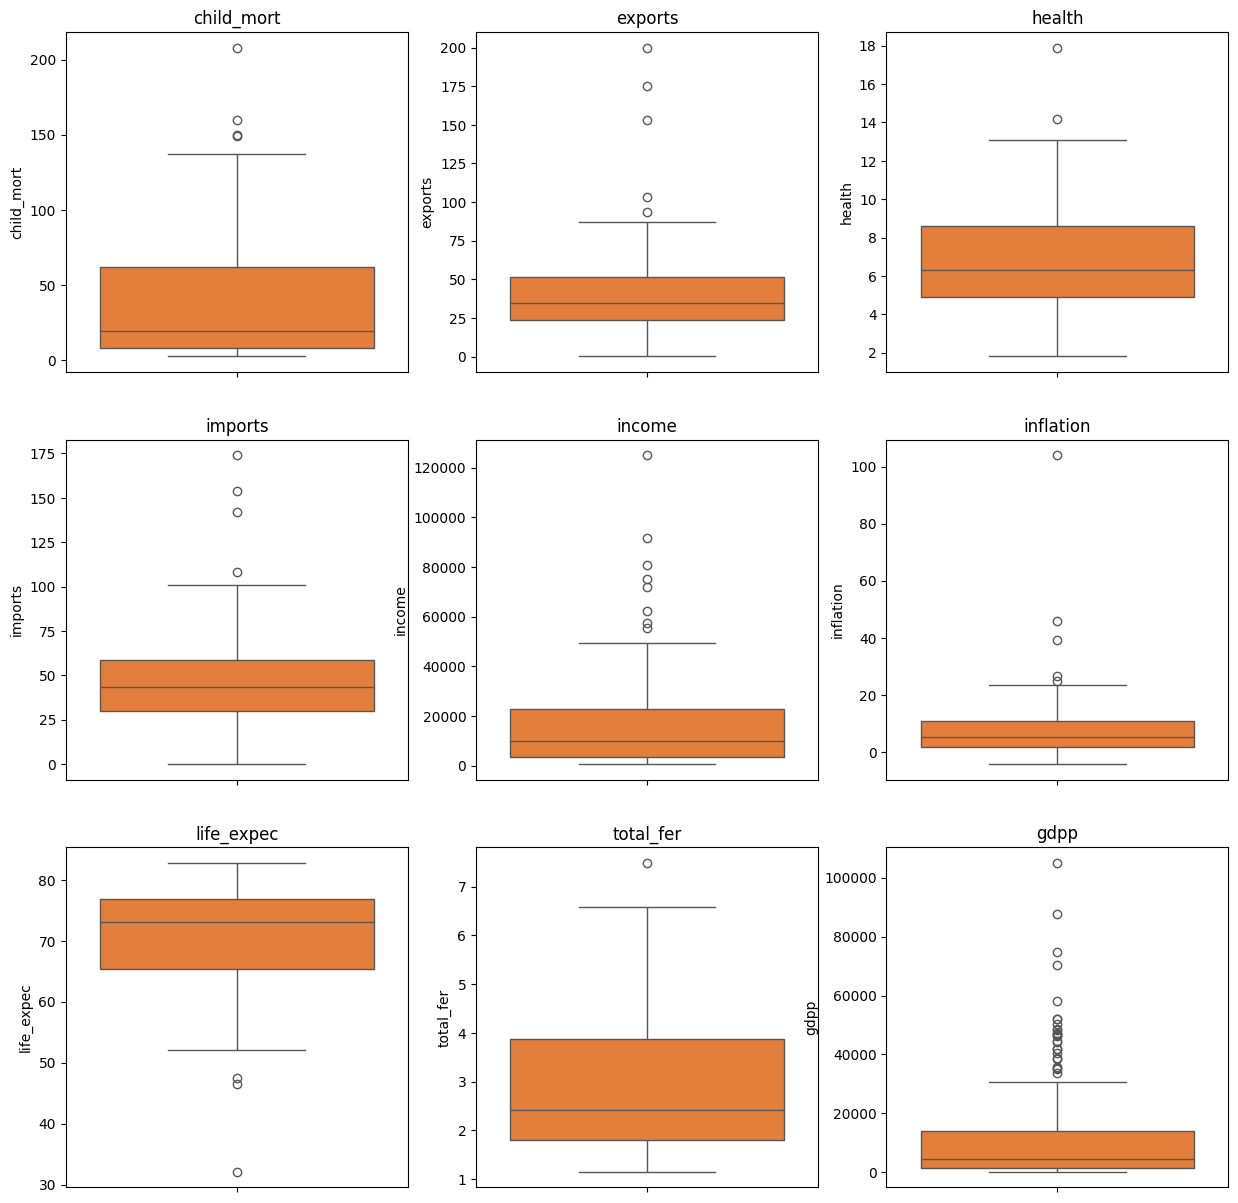

In [22]:
fig = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
for i in range(len(numerical_features)):
    plt.subplot(3, 3, i + 1)
    ax = sns.boxplot(data[numerical_features[i]], color=colors[0])
    plt.title(numerical_features[i])
plt.show()

# Summary EDA

- Sức khỏe, **African countries** có thứ hạng cao hơn trong tất cả các tình huống không phù hợp. Họ có sự hiện diện đáng kể trong **child_mort** cao, **life_expec** thấp và **total_fer** cao.
- Tất cả những vấn đề này đều khá nghiêm trọng và do đó, việc hỗ trợ họ trong thời kỳ hỗn loạn không lường trước là rất quan trọng. Bất chấp những con số như vậy, **Haiti** vẫn chiếm vị trí hàng đầu với các giá trị **child_mort** cao. **Asian & European countries** có mặt ở đầu bên kia của nó.
- **US** là những người chi tiêu nhiều nhất cho **health** của họ, tuy nhiên họ không có mặt trong 5 thứ hạng hàng đầu của **life_expec** & **total_fer**. Không có quốc gia nào có **life_expec** cao có mặt trong top 5 của **health**. **Asia countries** tập trung ở đầu dưới của **health**.
- **Singapore**, **Malta**, **Luxembourg** và **Seychelles** nằm trong top 5 **exports** cũng như **imports**. Quy mô dân số và vị trí địa lý đóng vai trò then chốt khi nói đến **imports** và **exports**.
- **Sudan** là quốc gia **châu Phi** duy nhất có **imports** thấp và **Brazil** có mức nhập khẩu thấp nhất trong số tất cả.
- **African countries** có giá trị **inflation** rất cao trong khi các quốc gia từ mọi châu lục đều có giá trị **inflation** thấp.
- Công dân của **Qatar** được trả lương cao nhất với **Singapore** và **Luxembourg** có vị trí trong top 5 **income**.
- Đối với **gdpp**, **Luxembourg** đứng đầu. **Switzerland** và **Qatar** nằm trong top 5 tương tự như **income**.
- **African countries** nằm ở mức **income** thấp cũng như **gdpp**. Chủ nghĩa thực dân đã gây ra thiệt hại to lớn cho các **African countries**.

# Feature Engineering

### Correlation Matrix :

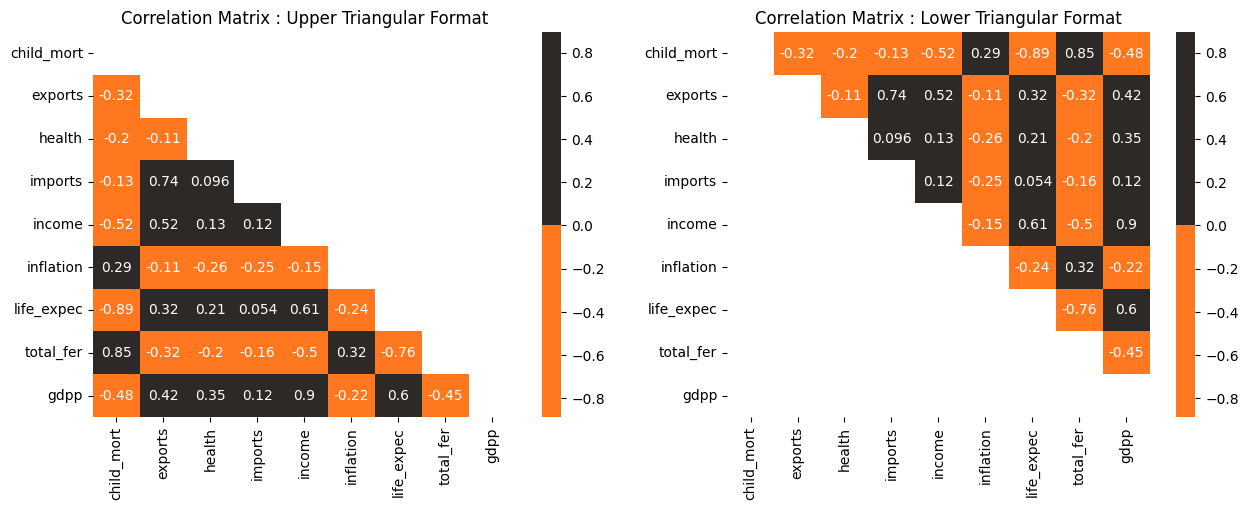

In [23]:
ut = np.triu(data.corr())
lt = np.tril(data.corr())

fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)
sns.heatmap(data.corr(),cmap = colors,annot = True,cbar = 'True',mask = ut);
plt.title('Correlation Matrix : Upper Triangular Format');

plt.subplot(1,2,2)
sns.heatmap(data.corr(),cmap = colors,annot = True,cbar = 'True',mask = lt);
plt.title('Correlation Matrix : Lower Triangular Format');

- Nhiều features có mối quan hệ với nhau.
- **child_mort** tăng khi **imcome**, **gdpp** và **exports** giảm. **inflation** tăng -> **child_mort** cao. Các điều kiện kinh tế lại đóng vai trò là một yếu tố quan trọng
- **exports** tăng làm tăng **gdpp**, **imcome** và **imports**.
- Chi tiêu cho **sức khỏe** có mức tăng nhỏ trong **life_expec** và cũng làm giảm **child_mort**.
- **imcome** và **gdpp** hiển thị giá trị tương quan 0,9 rất cao. Theo quan điểm về sức khỏe, **imcome** cao dẫn đến **life_expec** cao hơn nhưng làm giảm **total_fer** theo một biên độ đáng kể.
- **inflation** cao có tác động tiêu cực đến các features tài chính. **inflation** cao hiển thị **total_fer** và **child_mort** cao. Điều này mô tả các features điển hình của một quốc gia lạc hậu.
- Theo dữ liệu, **life_expec** cao hơn hiển thị **total_fer** thấp. **gdpp** cao hơn dẫn đến chi tiêu nhiều hơn cho **sức khỏe**.

**Chúng ta có thể thấy rõ rằng một số features về cơ bản thuộc cùng một danh mục và chúng có cùng phản ứng với các features khác thuộc danh mục khác.**
- 3 danh mục features là:
  - **health** : **child_mort**, **health**, **life_expec**, **total_fer**
  - **trade** : **imports**, **exports**
  - **finance** : **income**, **inflation**, **gdpp**
- -> Phân tách các features này thành các danh mục này và chuẩn hóa 

In [24]:
df1 = pd.DataFrame()
df1['Health'] = (data['child_mort'] / data['child_mort'].mean()) + (data['health'] / data['health'].mean()) + (data['life_expec'] / data['life_expec'].mean()) + (data['total_fer'] / data['total_fer'].mean())
df1['Trade'] = (data['imports'] / data['imports'].mean()) + (data['exports'] / data['exports'].mean())
df1['Finance'] = (data['income'] / data['income'].mean()) + (data['inflation'] / data['inflation'].mean()) + (data['gdpp'] / data['gdpp'].mean())
df1.head()

,Health,Trade,Finance
0,6.24,1.20,1.35
1,3.04,1.72,1.47
2,3.39,1.60,3.17
3,6.47,2.43,3.49
4,2.96,2.36,2.24


### Data Scaling :

In [25]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['Health'] = mms.fit_transform(df1[['Health']])
df1['Trade'] = mms.fit_transform(df1[['Trade']])
df1['Finance'] = mms.fit_transform(df1[['Finance']])
df1.insert(loc = 0, value = list(data['country']), column = 'Country')
df1.head()

,Country,Health,Trade,Finance
0,Afghanistan,0.63,0.14,0.08
1,Albania,0.13,0.20,0.09
2,Algeria,0.18,0.19,0.21
3,Angola,0.66,0.28,0.24
4,Antigua and Barbuda,0.12,0.28,0.15


- Mô hình máy học không hiểu được đơn vị của các giá trị đặc trưng. Nó chỉ coi đầu vào như những con số đơn thuần mà không hiểu được ý nghĩa thực sự của những giá trị đó. Do đó, việc chuẩn hóa dữ liệu trở nên cần thiết. 
- **Ví dụ:** Tuổi = Năm; FastingBS = mg/dl; Chi phí = Tiền tệ.  
- Chúng ta có 2 phương pháp để chuẩn hóa dữ liệu: 
- 1) **Normalization** (Chuẩn hóa) 
- 2) **Standardization** (Tiêu chuẩn hóa). 
- Vì hầu hết các thuật toán giả định rằng dữ liệu được phân phối theo phân phối chuẩn (Gaussian), nên **Normalization** được áp dụng cho các đặc trưng mà dữ liệu không tuân theo phân phối chuẩn, còn **Standardization** được áp dụng cho các đặc trưng có phân phối chuẩn, với giá trị rất lớn hoặc rất nhỏ so với các đặc trưng khác.  
- **Normalization**: Các đặc trưng như **Sức khỏe**, **Thương mại** và **Tài chính** được chuẩn hóa
- **Standardization**: Không có đặc trưng nào được tiêu chuẩn hóa trong bộ dữ liệu trên.  

**Normalization (Chuẩn hóa)** và **Standardization (Tiêu chuẩn hóa)** đều là các kỹ thuật biến đổi dữ liệu để giúp mô hình máy học hoạt động hiệu quả hơn, nhưng chúng khác nhau về cách thức và mục đích sử dụng. Dưới đây là sự khác biệt chính:  

| Tiêu chí            | **Normalization (Chuẩn hóa)**     | **Standardization (Tiêu chuẩn hóa)**    |  
|---------------------|----------------------------------|---------------------------------------|  
| **Khái niệm**         | Biến đổi dữ liệu về một khoảng cố định, thường là \([0, 1]\) hoặc \([-1, 1]\).  | Biến đổi dữ liệu để có phân phối chuẩn với trung bình bằng 0 và độ lệch chuẩn bằng 1. |  
| **Công thức**        | x_normalized = (x - x_min) / (x_max - x_min)  | x_standardized = x - muy / sigma  |  
| **Phạm vi giá trị**  | Giá trị biến đổi nằm trong khoảng xác định (ví dụ: \([0, 1]\)).  | Giá trị có thể vượt ra ngoài bất kỳ giới hạn cụ thể nào.  |  
| **Khi nào sử dụng**  | Khi không chắc dữ liệu có phân phối chuẩn và cần đưa tất cả các đặc trưng về cùng một thang đo.  | Khi dữ liệu có phân phối gần chuẩn (Gaussian) hoặc khi các đặc trưng có độ lớn rất khác nhau.  |  
| **Ứng dụng thực tế** | Các mô hình dựa trên khoảng cách như KNN, K-means, hoặc các mô hình dựa trên gradient.  | Các mô hình hồi quy tuyến tính, hồi quy logistic, hoặc thuật toán dựa trên phân phối chuẩn.  |  

**Tóm lại:**  
- **Normalization** phù hợp khi bạn muốn đưa dữ liệu về cùng một thang đo, đặc biệt khi dữ liệu không theo phân phối chuẩn.  
- **Standardization** phù hợp khi dữ liệu có phân phối chuẩn hoặc bạn muốn giữ lại thông tin về độ lệch chuẩn và sự phân bố.  

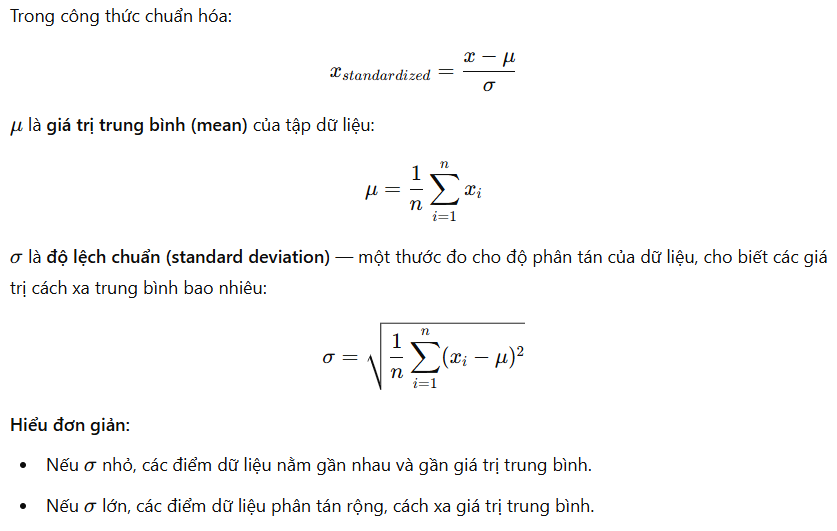

### Principal Component Analysis (PCA) :

- Đây là phương pháp giảm kích thước thường được sử dụng cho Bài toán học không giám sát.

In [26]:
df2 = data.copy(deep = True)

col = list(data.columns)
col.remove('health'); col.remove('country')

df2['health'] = ss.fit_transform(df2[['health']]) # Standardization

for i in col:
    df2[i] = mms.fit_transform(df2[[i]]) # Normalization
df2.drop(columns = 'country',inplace = True) 
df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.43,0.05,0.28,0.26,0.01,0.13,0.48,0.74,0.00
1,0.07,0.14,-0.10,0.28,0.07,0.08,0.87,0.08,0.04
2,0.12,0.19,-0.97,0.18,0.10,0.19,0.88,0.27,0.04
3,0.57,0.31,-1.45,0.25,0.04,0.25,0.55,0.79,0.03
4,0.04,0.23,-0.29,0.34,0.15,0.05,0.88,0.15,0.11


- Before passing the data for PCA transformation, **normalization** & **standardization** are very important.

In [27]:
from sklearn.decomposition import PCA

pca = PCA()
pca_df2 = pd.DataFrame(pca.fit_transform(df2))
pca.explained_variance_

array([1.01740511, 0.13090418, 0.03450018, 0.02679822, 0.00979752,
       0.00803398, 0.00307055, 0.00239976, 0.00179388])

- Đây là các giá trị phương sai của từng feature có trong tập dữ liệu.

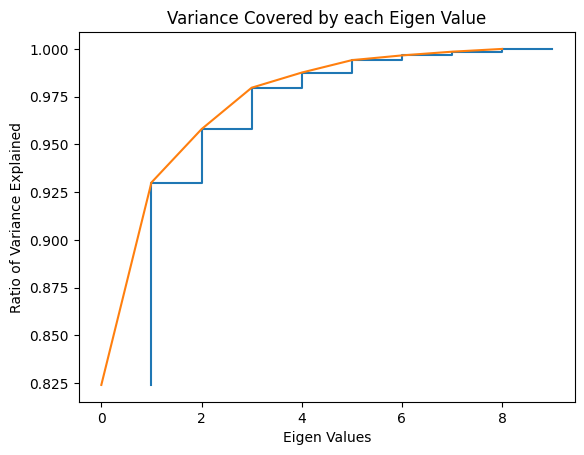

In [28]:
plt.step(list(range(1,10)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance Explained')
plt.title('Variance Covered by each Eigen Value')
plt.show()

- Đây là một phương pháp rất hiệu quả, trong đó chúng ta cộng dồn phương sai của tất cả các đặc trưng theo định dạng tích lũy.  
- Thông thường, **eigen values với hơn 95% tỷ lệ phương sai** sẽ được chọn.  
- Chúng tương ứng với các cột của dataframe được tạo ra bởi PCA.  
- Trong trường hợp này, chúng ta chọn **Eigen Value: 2** vì các bước được tạo ra có phương sai đáng kể, do đó các đặc trưng khác bị chi phối bởi phương sai của chúng.  

In [29]:
pca_df2 = pca_df2.drop(columns = [3,4,5,6,7,8])
pca_df2.head()

,0,1,2
0,0.22,0.64,0.09
1,-0.08,-0.17,-0.21
2,-0.96,-0.13,-0.13
3,-1.51,0.47,0.28
4,-0.26,-0.24,-0.06


- **In this way, we reduce the dimensions! We will now move on to the modeling section and compare the performances of the 2 datasets :**
    - **Feature Combination : Health - Trade - Finance**
    - **PCA Data**

# Modeling

- **Học không giám sát (Unsupervised Learning)**: Là bài toán trong đó biến mục tiêu hoặc đặc trưng chưa được biết trước. Các bài toán **học không giám sát** thường xuất hiện trong lĩnh vực y tế, nơi nhiều thông số được ghi nhận nhưng các bệnh tiềm ẩn vẫn chưa được xác định.  
- Tìm kiếm các mẫu (pattern) thông qua các kỹ thuật trực quan hóa giúp phát hiện ra những thông tin tiềm ẩn mà khó có thể nhận ra chỉ bằng cách quan sát dữ liệu dưới dạng bảng.  
- Tuy nhiên, khi kích thước tập dữ liệu trở nên lớn với quá nhiều đặc trưng, việc trực quan hóa dữ liệu trở nên rất phức tạp và mất thời gian. Do đó, cần chuyển sang tiếp cận bằng các thuật toán.  

In [30]:
m1 = df1.drop(columns = ['Country']).values # Feature Combination : Health - Trade - Finance
m2 = pca_df2.values # PCA Data

## <center>Phân cụm K-Means</center>

**Phân cụm K-Means** là một thuật toán dựa trên khoảng cách, được sử dụng cho bài toán học không giám sát và **không hỗ trợ các đặc trưng dạng phân loại**.  
- Đây là thuật toán được ưa chuộng nhất khi xử lý các bài toán **học không giám sát**, tìm cụm trong dữ liệu bằng cách tiếp cận toán học:  
    - Chọn ngẫu nhiên 2 (giả sử k = 2) tâm cụm ban đầu.  
    - Tính khoảng cách từ các tâm cụm đến tất cả các điểm dữ liệu.  
    - Nếu một điểm dữ liệu gần tâm cụm nào hơn, nó được gán nhãn theo tâm cụm đó và ngược lại.  
    - Với 2 cụm được hình thành, tính giá trị trung bình của các điểm dữ liệu trong từng cụm và sử dụng các giá trị này làm tâm cụm mới.  
    - Quá trình lặp lại cho đến khi các tâm cụm hội tụ về các vị trí cố định.  

- **Tham số k**: Xác định số lượng cụm hoặc nhóm mà dữ liệu được phân chia. Có 2 phương pháp thống kê phổ biến để chọn giá trị **k**:  
    - **Phương pháp Elbow**: Vẽ đồ thị tổng bình phương sai số (SSE) cho các giá trị **k** khác nhau. Nếu đồ thị có hình dạng giống cánh tay gập, điểm uốn ("elbow") chính là giá trị **k** phù hợp nhất. Từ điểm này trở đi, SSE bắt đầu giảm tuyến tính, cho thấy đây là lựa chọn tối ưu.  
    - **Phương pháp Silhouette Score**: Đánh giá chất lượng các cụm bằng cách đo độ tương đồng giữa các điểm dữ liệu trong cùng một cụm. Giá trị **k** có điểm silhouette cao nhất sẽ được chọn làm số cụm tối ưu.  

### <center>Feature Combination : Health - Trade - Finance</center> 

#### Elbow Method & Silhouette Score Method :

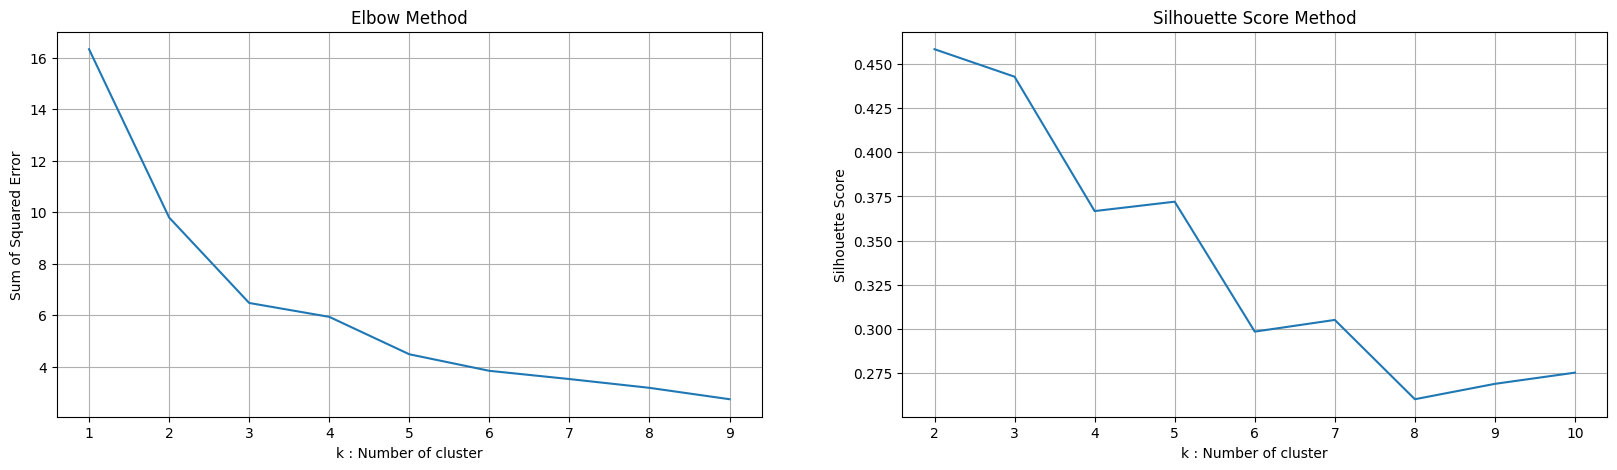

In [31]:
sse = {}
sil = []
kmax = 10
fig = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Elbow Method :
plt.subplot(1, 2, 1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m1)
    sse[k] = (
        kmeans.inertia_
    )  # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x=list(sse.keys()), y=list(sse.values()))
plt.title("Elbow Method")
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

# Silhouette Score Method
plt.subplot(1, 2, 2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters=k).fit(m1)
    labels = kmeans.labels_
    sil.append(silhouette_score(m1, labels, metric="euclidean"))
sns.lineplot(x=range(2, kmax + 1), y=sil)
plt.title("Silhouette Score Method")
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.grid()

plt.show()

- Từ kết quả của hai phương pháp trên:  
    - **k: Số cụm = 3**  

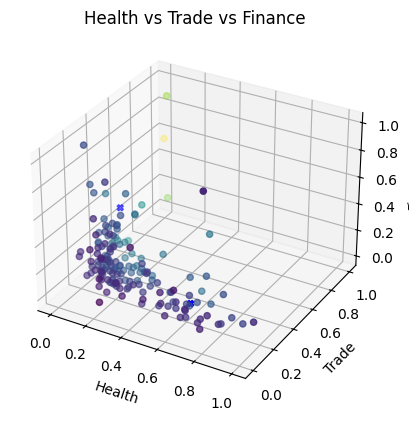

In [32]:
model = KMeans(n_clusters=3, max_iter=1000)
model.fit(m1)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_
data["Class"] = labels
df1["Class"] = labels

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
x = np.array(df1["Health"])
y = np.array(df1["Trade"])
z = np.array(df1["Finance"])
ax.scatter3D(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker="X", color="b")
ax.scatter3D(x, y, z, c=y)
plt.title("Health vs Trade vs Finance")
ax.set_xlabel("Health")
ax.set_ylabel("Trade")
ax.set_zlabel("Finance")
plt.show()

- Các cụm đã được tạo ra, nhưng chưa xác định được giá trị nào tương ứng với cụm nào.  
- Do đó, cần vẽ boxplot của **thu nhập (income)** và **tỷ lệ tử vong trẻ em (child_mort)** theo các cụm được gán nhãn.  
- **Thu nhập thấp và tỷ lệ tử vong trẻ em cao** là dấu hiệu của một **quốc gia kém phát triển về kinh tế**.  

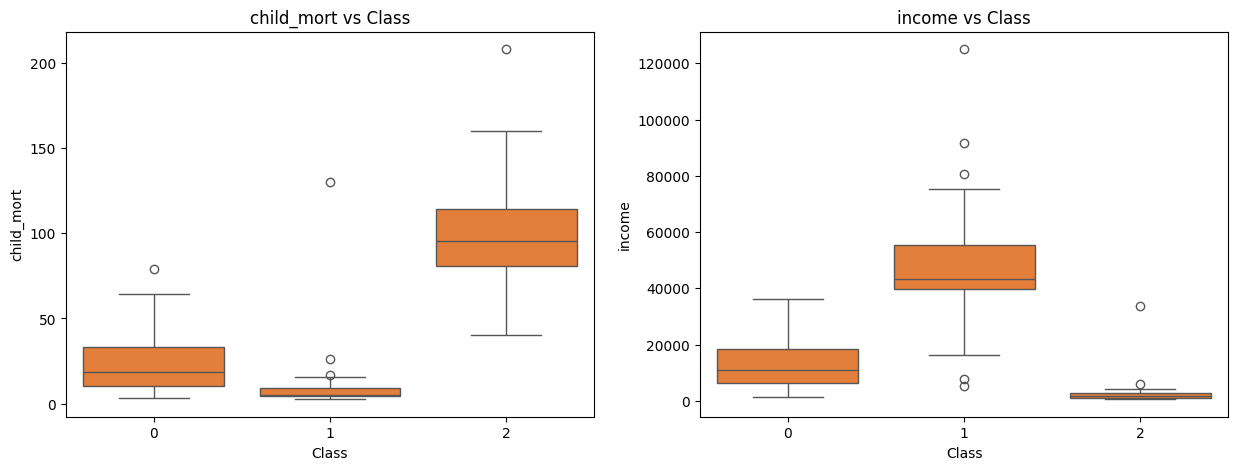

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="Class", y="child_mort", data=data, color="#FF781F")
plt.title("child_mort vs Class")

plt.subplot(1, 2, 2)
sns.boxplot(x="Class", y="income", data=data, color="#FF781F")
plt.title("income vs Class")

plt.show()

- Từ biểu đồ trên, có thể kết luận:  
    - **1: Không cần hỗ trợ**  
    - **2: Cần hỗ trợ**  
    - **0: Có thể cần hỗ trợ**  

In [34]:
df1["Class"].loc[df1["Class"] == 0] = "No Help Needed"
df1["Class"].loc[df1["Class"] == 1] = "Help Needed"
df1["Class"].loc[df1["Class"] == 2] = "Might Need Help"

fig = px.choropleth(
    df1[["Country", "Class"]],
    locationmode="country names",
    locations="Country",
    title="Needed Help Per Country (World)",
    color=df1["Class"],
    color_discrete_map={
        "Help Needed": "Red",
        "No Help Needed": "Green",
        "Might Need Help": "Yellow",
    },
)
fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(
    legend_title_text="Labels", legend_title_side="top", title_pad_l=260, title_y=0.86
)
fig.show(engine="kaleido")

In [35]:
# pip install nbformat

### <center>PCA Data</center> 

#### Elbow Method & Silhouette Score Method :

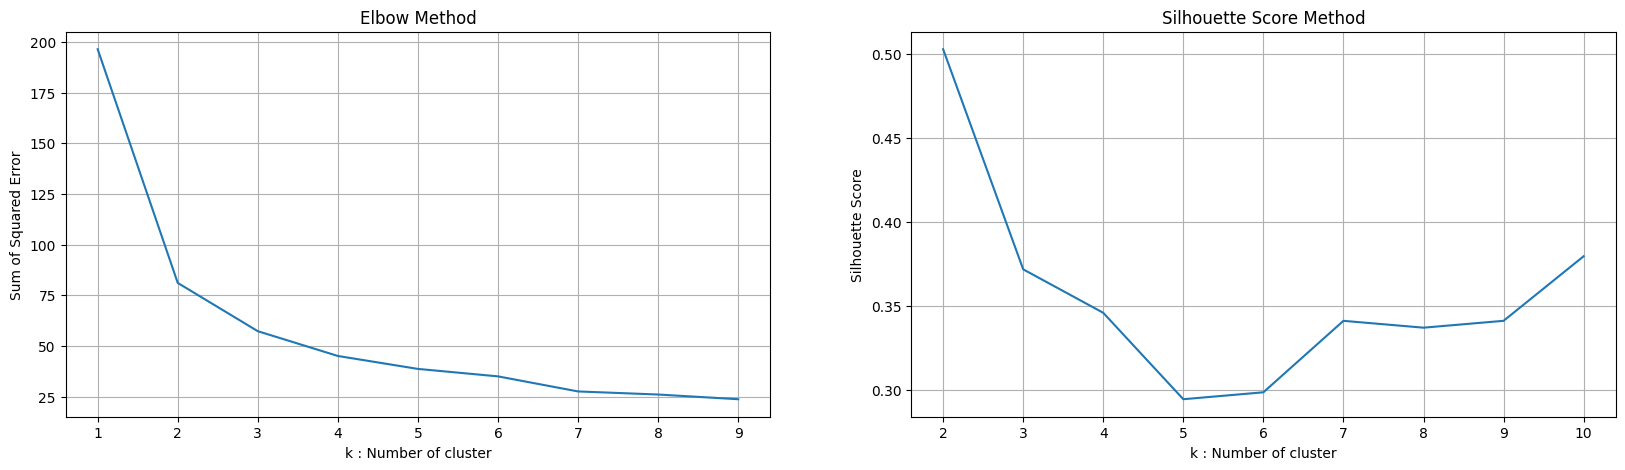

In [36]:
sse = {}
sil = []
kmax = 10
fig = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Elbow Method :
plt.subplot(1, 2, 1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m2)
    sse[k] = (
        kmeans.inertia_
    )  # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x=list(sse.keys()), y=list(sse.values()))
plt.title("Elbow Method")
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

# Silhouette Score Method
plt.subplot(1, 2, 2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters=k).fit(m2)
    labels = kmeans.labels_
    sil.append(silhouette_score(m2, labels, metric="euclidean"))
sns.lineplot(x=range(2, kmax + 1), y=sil)
plt.title("Silhouette Score Method")
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.grid()

plt.show()

- Từ kết quả của hai phương pháp trên:  
    - **k: Số cụm = 3**  

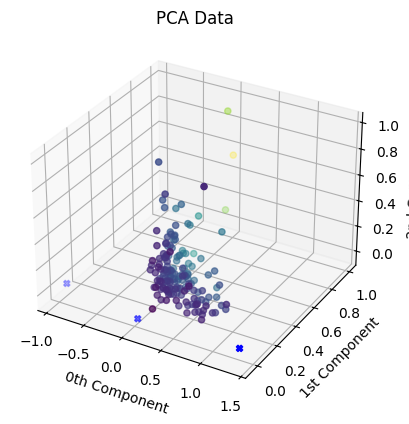

In [37]:
model = KMeans(n_clusters=3, max_iter=1000)
model.fit(m2)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_
data["Class"] = labels
pca_df2["Class"] = labels

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker="X", color="b")
plt.title("PCA Data")
ax.set_xlabel("0th Component")
ax.set_ylabel("1st Component")
ax.set_zlabel("2nd Component")
ax.scatter(x, y, z, c=y)
plt.show()

- Tiếp tục kiểm tra biểu đồ phân tán của **income** và **child_mort** theo các cụm đã được gán nhãn để xác nhận giá trị của các cụm!  
- **Thu nhập thấp và tỷ lệ tử vong trẻ em cao** là dấu hiệu của một **quốc gia kém phát triển về kinh tế**.  

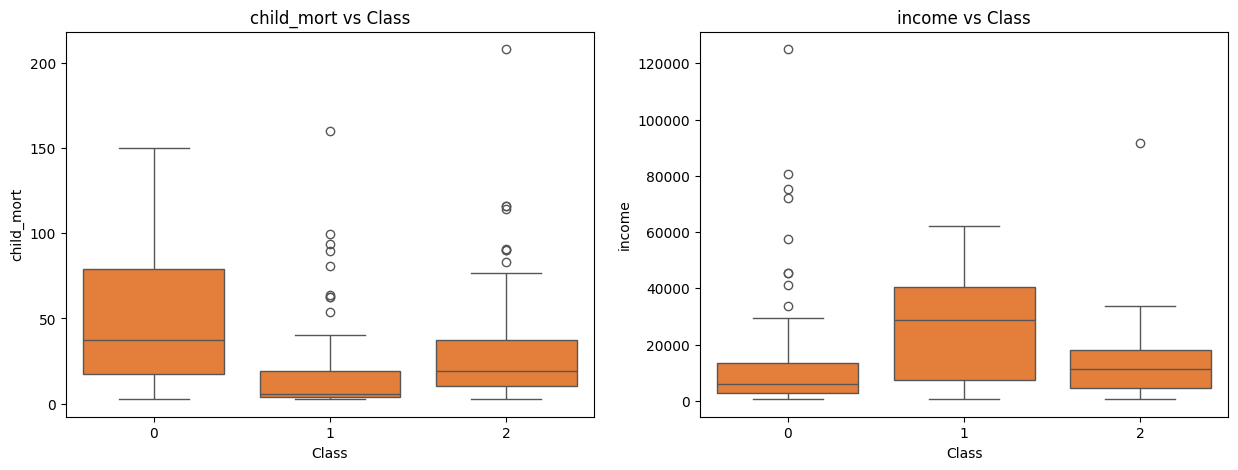

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="Class", y="child_mort", data=data, color="#FF781F")
plt.title("child_mort vs Class")

plt.subplot(1, 2, 2)
sns.boxplot(x="Class", y="income", data=data, color="#FF781F")
plt.title("income vs Class")

plt.show()

- Từ biểu đồ trên có thể kết luận:  
    - **2 : Có thể cần hỗ trợ**  
    - **0 : Cần hỗ trợ**  
    - **1 : Không cần hỗ trợ**  

In [39]:
pca_df2.insert(0, column="Country", value=data["country"])

pca_df2["Class"].loc[pca_df2["Class"] == 0] = "Might Need Help"
pca_df2["Class"].loc[pca_df2["Class"] == 1] = "Help Needed"
pca_df2["Class"].loc[pca_df2["Class"] == 2] = "No Help Needed"

fig = px.choropleth(
    pca_df2[["Country", "Class"]],
    locationmode="country names",
    locations="Country",
    title="Needed Help Per Country (World)",
    color=pca_df2["Class"],
    color_discrete_map={
        "Help Needed": "Red",
        "Might Need Help": "Yellow",
        "No Help Needed": "Green",
    },
)
fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(
    legend_title_text="Labels", legend_title_side="top", title_pad_l=260, title_y=0.86
)
fig.show(engine="kaleido")

## <center>Density Based Spatial Clustering of Application with Noise Clustering</center>  

**DBSCAN Clustering** là một thuật toán phân cụm dựa trên mật độ được sử dụng cho các bài toán học không giám sát.  
- Nhằm khắc phục các vấn đề của **K-Means Clustering** với dữ liệu lồng nhau và dữ liệu có số chiều cao, **DBSCAN Clustering** giải quyết được những hạn chế này! Thuật toán này có 3 thuật ngữ quan trọng và 2 siêu tham số chính:  
    - **Thuật ngữ:**  
        - **Core Point:** Là điểm trung tâm có số lượng **minPts** điểm dữ liệu trong vùng lân cận của nó và các điểm trong vùng này có thể mở rộng cụm.  
        - **Non-Core Point:** Là điểm trung tâm không có đủ số lượng **minPts** điểm dữ liệu trong vùng lân cận của nó và không thể mở rộng cụm.  
        - **Outliers / Noise:** Là các điểm dữ liệu không thuộc bất kỳ cụm nào.  
    - **Siêu tham số:**  
        - **minPts:** Là số lượng tối thiểu các điểm dữ liệu cần có trong vùng lân cận của một điểm để được coi là **Core Point**.  
        - **Epsilon:** Là bán kính của vùng lân cận xung quanh một điểm trung tâm.  

- **DBSCAN Clustering** tạo các cụm theo các bước sau:  
    - Chọn ngẫu nhiên một điểm từ tập dữ liệu và coi nó là điểm trung tâm.  
    - Kiểm tra các điểm dữ liệu khác nằm trong vùng lân cận của điểm này với bán kính là giá trị **Epsilon**.  
    - Nếu vùng này chứa ít nhất **minPts** điểm dữ liệu, điểm trung tâm này được coi là **Core Point**.  
    - Các điểm trong vùng lân cận này cũng được coi là **Core Point** và tiếp tục mở rộng cụm theo cùng quy tắc.  
    - Nếu một điểm không thỏa mãn các điều kiện, nó được coi là **Non-Core Point**, vẫn thuộc cụm nhưng không thể mở rộng cụm.  
    - Khi tất cả các **Core Points** đã bao phủ xong các điểm dữ liệu, các **Non-Core Points** được thêm vào và cụm hoàn tất.  
    - Cụm tiếp theo được hình thành theo cùng quy tắc. Các điểm không thuộc bất kỳ cụm nào được coi là **Outliers / Noise**.  

- Các siêu tham số đóng vai trò rất quan trọng trong quá trình này, vì vậy việc gán giá trị cho chúng cần tuân theo các nguyên tắc:  
    - **minPts:** Nếu D là số lượng chiều hoặc số lượng đặc trưng của tập dữ liệu, thì **minPts** >= D + 1. Thông thường, với các tập dữ liệu nhỏ hoặc có nhiều nhiễu, **minPts** >= 2 * D.  
    - **Epsilon:** Giá trị này thường được xác định bằng cách sử dụng đồ thị **k-distance graph** được tạo ra từ mô hình **KNN**. Điểm mà đồ thị thay đổi đột ngột chính là giá trị được chọn.  

In [84]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

### <center>Feature Combination : Health - Trade - Finance</center> 

Text(0.5, 1.0, 'K-Distance Graph')

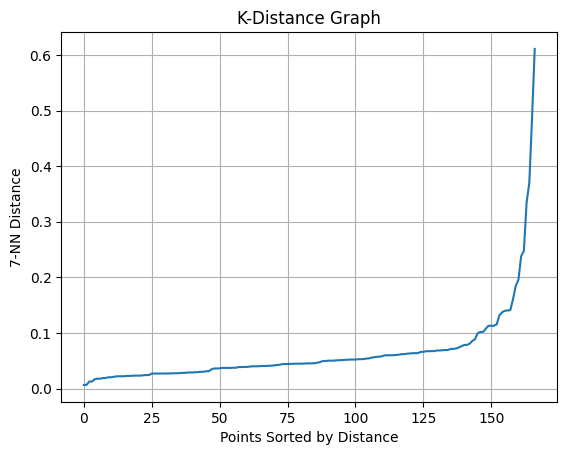

In [85]:
knn = NearestNeighbors(n_neighbors=7)
model = knn.fit(m1)
distances, indices = knn.kneighbors(m1)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.grid()
plt.plot(distances)
plt.xlabel("Points Sorted by Distance")
plt.ylabel("7-NN Distance")
plt.title("K-Distance Graph")

- Chọn **minPts** = 8, tức là >= 2 * 3 đặc trưng  
- Giá trị gán cho **n_neighbors**: **minPts** - 1  
- Từ biểu đồ trên, chọn:  
    - **eps**: 0.08  

In [86]:
db = DBSCAN(eps=0.080, min_samples=8).fit(m1)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Number of Clusters : ", n_clusters_)
print("Number of Outliers : ", n_noise_)

data["Class"] = labels
df1["Class"] = labels

Number of Clusters :  3
Number of Outliers :  67


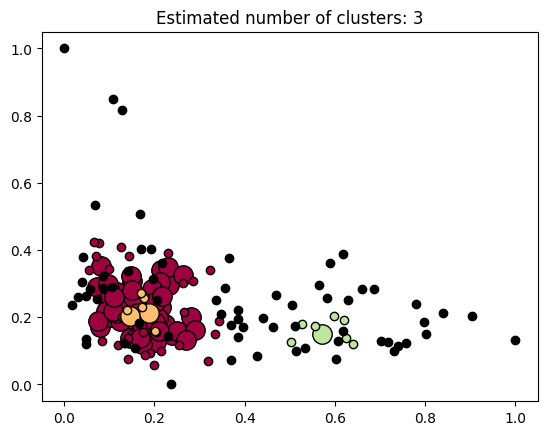

In [87]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = labels == k

    xy = m1[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = m1[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [88]:
df1

,Country,Health,Trade,Finance,Class
0,Afghanistan,0.63,0.14,0.08,2
1,Albania,0.13,0.20,0.09,0
2,Algeria,0.18,0.19,0.21,0
3,Angola,0.66,0.28,0.24,-1
4,Antigua and Barbuda,0.12,0.28,0.15,0
...,...,...,...,...,...
162,Vanuatu,0.22,0.26,0.04,0
163,Venezuela,0.13,0.12,0.56,-1
164,Vietnam,0.17,0.40,0.12,-1
165,Yemen,0.40,0.17,0.23,-1


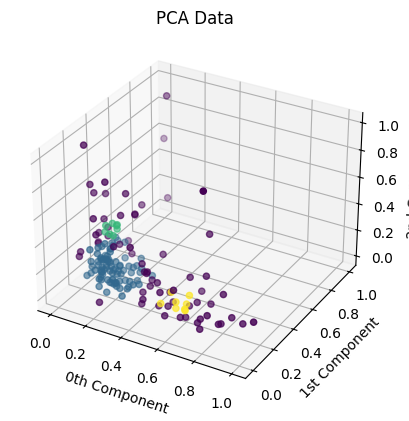

In [89]:
# Plot 3D with DBSCAN and PCA Data
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
x = np.array(df1['Health'])
y = np.array(df1['Trade'])
z = np.array(df1['Finance'])
ax.scatter(x,y,z,c = df1['Class'])
plt.title('PCA Data')
ax.set_xlabel('0th Component')
ax.set_ylabel('1st Component')
ax.set_zlabel('2nd Component')
plt.show();

In [90]:
df1

,Country,Health,Trade,Finance,Class
0,Afghanistan,0.63,0.14,0.08,2
1,Albania,0.13,0.20,0.09,0
2,Algeria,0.18,0.19,0.21,0
3,Angola,0.66,0.28,0.24,-1
4,Antigua and Barbuda,0.12,0.28,0.15,0
...,...,...,...,...,...
162,Vanuatu,0.22,0.26,0.04,0
163,Venezuela,0.13,0.12,0.56,-1
164,Vietnam,0.17,0.40,0.12,-1
165,Yemen,0.40,0.17,0.23,-1


- Sau khi đã có các cụm, nhưng chưa biết giá trị nào tương ứng với cụm nào
- Do đó, vẽ biểu đồ boxplot của **thu nhập (income)** và **tỷ lệ tử vong trẻ em (child_mort)** theo các cụm đã được gán nhãn.  
- Có **thu nhập thấp và tỷ lệ tử vong trẻ em cao** là dấu hiệu của một **quốc gia kém phát triển về kinh tế**.  

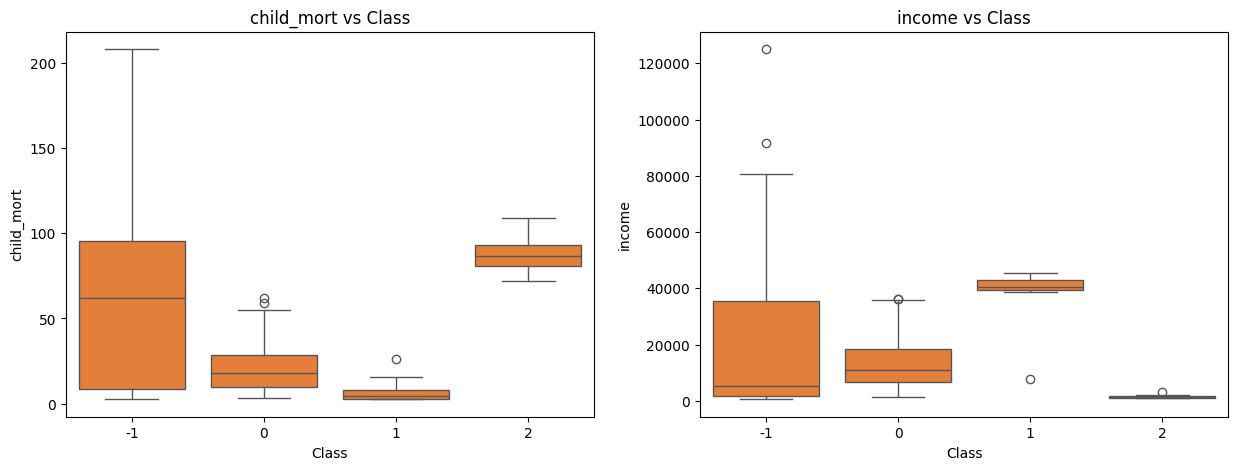

In [91]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="Class", y="child_mort", data=data, color="#FF781F")
plt.title("child_mort vs Class")

plt.subplot(1, 2, 2)
sns.boxplot(x="Class", y="income", data=data, color="#FF781F")
plt.title("income vs Class")

plt.show()

- Theo quy tắc, **-1** được gán cho **Nhiễu / Điểm ngoại lai**!  
- Từ biểu đồ trên, có thể kết luận:  
    - **-1 : Nhiễu / Điểm ngoại lai**  
    - **1 : Có thể cần hỗ trợ**  
    - **0 : Không cần hỗ trợ**  
    - **2 : Cần hỗ trợ**  

In [92]:
df1["Class"].loc[df1["Class"] == -1] = "Noise / Outliers"
df1["Class"].loc[df1["Class"] == 0] = "Might Need Help"
df1["Class"].loc[df1["Class"] == 1] = "No Help Needed"
df1["Class"].loc[df1["Class"] == 2] = "Help Needed"

fig = px.choropleth(
    df1[["Country", "Class"]],
    locationmode="country names",
    locations="Country",
    title="Needed Help Per Country (World)",
    color=df1["Class"],
    color_discrete_map={
        "Noise / Outliers": "Black",
        "Help Needed": "Red",
        "Might Need Help": "Yellow",
        "No Help Needed": "Green",
    },
)
fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(
    legend_title_text="Labels", legend_title_side="top", title_pad_l=260, title_y=0.86
)
fig.show(engine="kaleido")

In [49]:
# đếm số lượng các nhóm theo từng nhóm country
# df1.groupby('Country')['Class'].value_counts().unstack().fillna(0).astype(int)


In [93]:
# sillhouette score for DBSCAN
print(silhouette_score(m1, labels, metric="euclidean"))

0.04598321219612523


In [94]:
res = []
data_1 = df1["Class"].value_counts().to_dict()
data_1
res.append(data_1)
res

[{'Might Need Help': 84,
  'Noise / Outliers': 67,
  'Help Needed': 8,
  'No Help Needed': 8}]

### <center>PCA Data</center> 

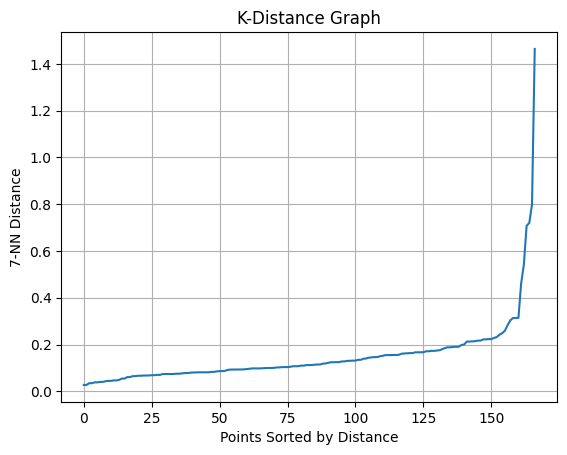

In [95]:
knn = NearestNeighbors(n_neighbors=7)
model = knn.fit(m2)
distances, indices = knn.kneighbors(m2)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.xlabel("Points Sorted by Distance")
plt.ylabel("7-NN Distance")
plt.title("K-Distance Graph")
plt.grid()
plt.plot(distances)

- Chọn **minPts** = 8, tức là lớn hơn hoặc bằng 2 * 3 đặc trưng.  
- Giá trị gán cho **n_neighbors**: **minPts** - 1.  
- Từ đồ thị phía trên, chọn:  
    - **eps**: 0.08  

In [96]:
db = DBSCAN(eps=0.2, min_samples=8).fit(m2)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Number of Clusters : ", n_clusters_)
print("Number of Outliers : ", n_noise_)

data["Class"] = labels
pca_df2["Class"] = labels

Number of Clusters :  3
Number of Outliers :  94


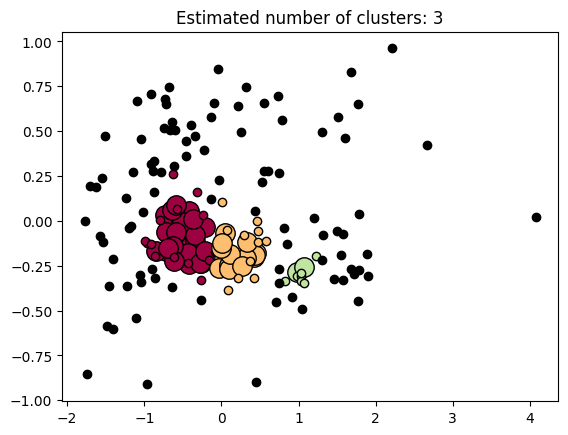

In [97]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = labels == k

    xy = m2[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = m2[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [98]:
pca_df2

,Country,0,1,2,Class
0,Afghanistan,0.22,0.64,0.09,-1
1,Albania,-0.08,-0.17,-0.21,0
2,Algeria,-0.96,-0.13,-0.13,0
3,Angola,-1.51,0.47,0.28,-1
4,Antigua and Barbuda,-0.26,-0.24,-0.06,0
...,...,...,...,...,...
162,Vanuatu,-0.58,0.09,-0.02,0
163,Venezuela,-0.69,-0.15,-0.17,0
164,Vietnam,0.01,-0.12,-0.02,1
165,Yemen,-0.63,0.26,-0.02,0


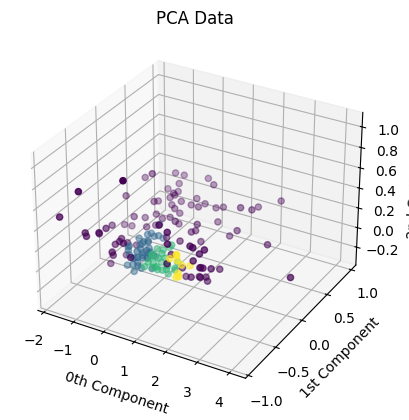

In [99]:
# Plot 3D with DBSCAN and PCA Data
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
x = np.array(pca_df2[0])
y = np.array(pca_df2[1])
z = np.array(pca_df2[2])
ax.scatter(x,y,z,c = pca_df2['Class'])
plt.title('PCA Data')
ax.set_xlabel('0th Component')
ax.set_ylabel('1st Component')
ax.set_zlabel('2nd Component')
plt.show();


- Vẽ lại boxplot của **income** và **child_mort** theo các cụm đã được gán nhãn để xác định mức độ hỗ trợ cần thiết cho các quốc gia.  
- **low income và high child_mort** là dấu hiệu của một **quốc gia kém phát triển về kinh tế**.  

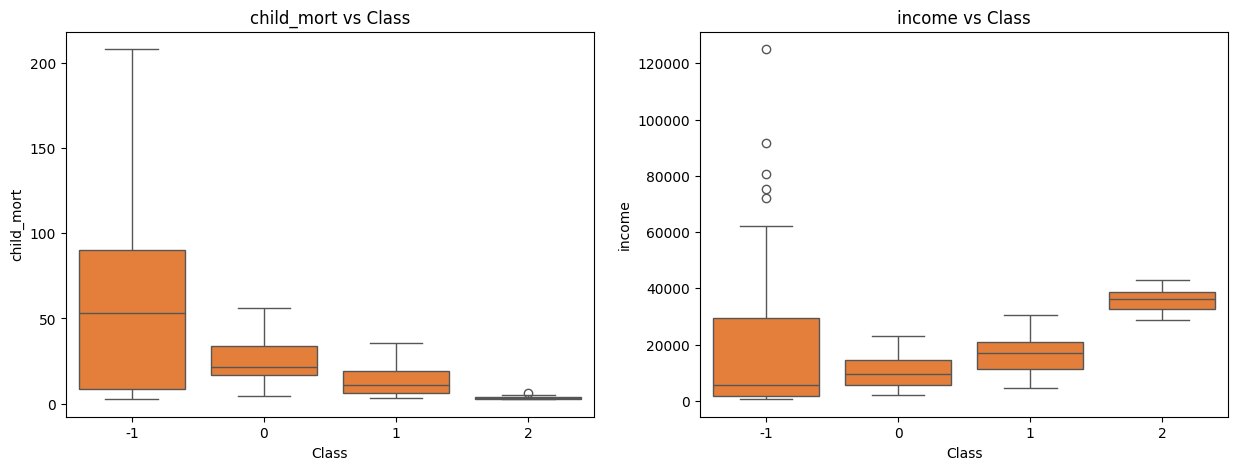

In [100]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="Class", y="child_mort", data=data, color="#FF781F")
plt.title("child_mort vs Class")

plt.subplot(1, 2, 2)
sns.boxplot(x="Class", y="income", data=data, color="#FF781F")
plt.title("income vs Class")

plt.show()

- Từ biểu đồ trên, có thể kết luận:  
    - **-1 : Nhiễu / Điểm ngoại lai**  
    - **2 : Cần hỗ trợ**  
    - **1 : Có thể cần hỗ trợ**  
    - **0 : Không cần hỗ trợ**  

In [101]:
pca_df2["Class"].loc[pca_df2["Class"] == -1] = "Noise / Outliers"
pca_df2["Class"].loc[pca_df2["Class"] == 0] = "Help Needed"
pca_df2["Class"].loc[pca_df2["Class"] == 1] = "Might Need Help"
pca_df2["Class"].loc[pca_df2["Class"] == 2] = "No Help Needed"

fig = px.choropleth(
    pca_df2[["Country", "Class"]],
    locationmode="country names",
    locations="Country",
    title="Needed Help Per Country (World)",
    color_discrete_sequence=["orange", "red", "green", "black"],
    color=pca_df2["Class"],
    color_discrete_map={
        "Noise / Outliers": "Black",
        "Help Needed": "Red",
        "Might Need Help": "Yellow",
        "No Help Needed": "Green",
    },
)
fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(
    legend_title_text="Labels", legend_title_side="top", title_pad_l=260, title_y=0.86
)
fig.show(engine="kaleido")

In [102]:
print(silhouette_score(m2, labels, metric="euclidean"))

-0.046432582992759035


In [60]:
data_2 = pca_df2['Class'].value_counts().to_dict()
data_2
res.append(data_2)
res

[{'Might Need Help': 84,
  'Noise / Outliers': 67,
  'Help Needed': 8,
  'No Help Needed': 8},
 {'Noise / Outliers': 94,
  'Help Needed': 39,
  'Might Need Help': 25,
  'No Help Needed': 9}]

## <center>Phân cụm phân cấp</center>  

**Hierarchical Clustering** là một thuật toán dựa trên khoảng cách, được sử dụng cho các bài toán học không giám sát.  

- Thuật toán này phát triển hệ thống phân cấp của các cụm dưới dạng một cây, được gọi là **dendrogram**. Trong bài toán này, ta sẽ sử dụng **Agglomerative Clustering**, một phương pháp từ dưới lên, coi mỗi điểm dữ liệu là một cụm riêng lẻ và sau đó hợp nhất chúng lại dựa trên khoảng cách theo các bước sau:  
    - Ban đầu, mỗi điểm dữ liệu được coi là một cụm.  
    - Các cụm gần nhau nhất sẽ được hợp nhất thành một cụm mới.  
    - Cụm mới này tiếp tục được so sánh với các cụm khác và hợp nhất với cụm gần nhất.  
    - Quá trình này tiếp tục cho đến khi tất cả các điểm hợp nhất thành một cụm lớn duy nhất.  

- Quá trình tạo cụm này được thể hiện bằng **dendrogram**. Từ biểu đồ này, ta chọn số lượng cụm bằng cách xác định số lần hợp nhất ở giai đoạn áp chót. Độ dài của các đường thẳng đứng càng lớn thể hiện khoảng cách giữa các cụm càng xa.  
- Để chọn số lượng cụm, ta đặt một ngưỡng giá trị và đếm số lượng đường thẳng đứng nằm phía trên ngưỡng này. Số đường thẳng này chính là số lượng cụm. Ngoài ra, các phương pháp như **Silhouette Score Method** và **Elbow Method** cũng có thể được sử dụng.  
- Với **Agglomerative Clustering**, có 2 siêu tham số quan trọng:  
    - **linkage**: Các phương pháp liên kết cụm, ví dụ như Single, Centroid, Average, v.v.  
    - **metric**: Công thức tính khoảng cách để so sánh trước khi hợp nhất các cụm.  

In [61]:
from scipy.cluster.hierarchy import dendrogram, linkage

### <center>Feature Combination : Health - Trade - Finance</center> 

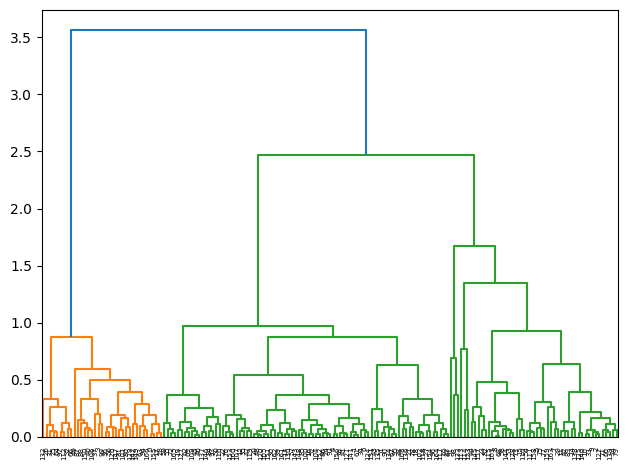

In [62]:
linkage_data = linkage(m1, method = 'ward', metric = 'euclidean')
dendrogram(linkage_data)
plt.tight_layout()
plt.show()

- Trong trường hợp này, ta cần chia các quốc gia thành 3 nhóm. Vì vậy, ta sẽ chọn trực tiếp 3 cụm. Phân tích dendrogram cho tập dữ liệu này khá dư thừa.  
- Ở đây, ta thấy 1 **đường màu cam** cùng với 2 **đường xanh** là các cụm áp chót trước khi được kết nối lại với nhau.  
- Dendrogram có 3 nhánh, cho thấy **3 cụm** được tạo ra trước khi hợp nhất thành một cụm duy nhất!  

In [63]:
from sklearn.cluster import AgglomerativeClustering

hierarchical_cluster = AgglomerativeClustering(
    n_clusters=3, linkage="ward", metric="euclidean"
)
labels = hierarchical_cluster.fit(m1)

pred_agc = pd.Series(hierarchical_cluster.labels_)
data["Class"] = pred_agc
df1["Class"] = pred_agc

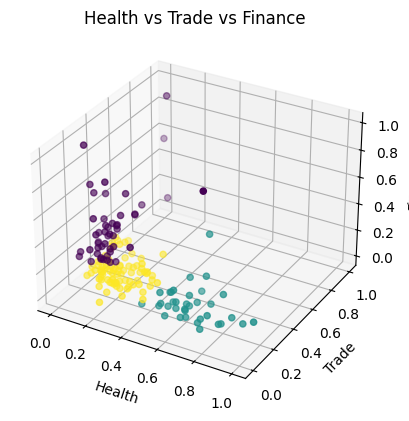

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
x = np.array(df1['Health'])
y = np.array(df1['Trade'])
z = np.array(df1['Finance'])
ax.scatter(x,y,z,c = df1['Class'])
plt.title('Health vs Trade vs Finance')
ax.set_xlabel('Health')
ax.set_ylabel('Trade')
ax.set_zlabel('Finance')
plt.show();

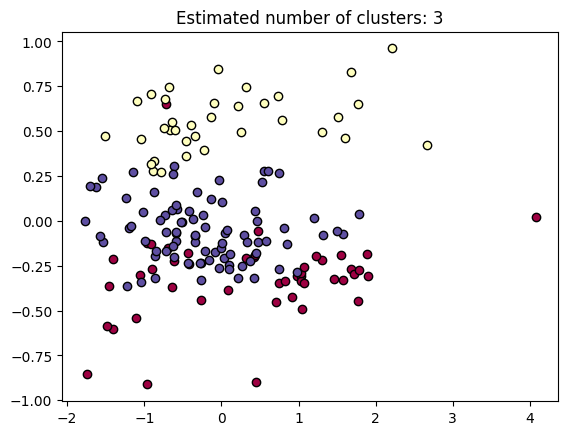

In [65]:
# plot result of hierarchical clustering with 3 clusters in 2D by ditribution of child_mort and income with scatter plot

unique_labels = set(pred_agc)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    class_member_mask = pred_agc == k
    xy = m2[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col), markeredgecolor="k")
    
plt.title("Estimated number of clusters: %d" % 3)
plt.show()

- Đã có các cụm nhưng chưa biết giá trị nào tương ứng với cụm nào
- Vì vậy, vẽ các boxplot của **income** và **child_mort** theo các cụm đã được gán nhãn.  
- Biết rằng **thu nhập thấp và tỷ lệ tử vong trẻ em cao** là dấu hiệu của **quốc gia kém phát triển về kinh tế**.  

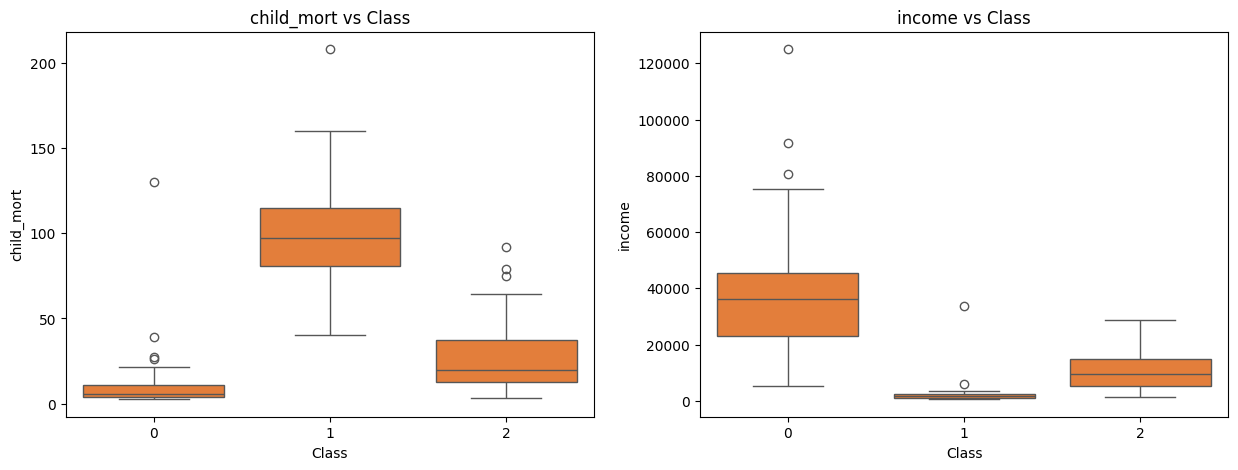

In [66]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="Class", y="child_mort", data=data, color="#FF781F")
plt.title("child_mort vs Class")

plt.subplot(1, 2, 2)
sns.boxplot(x="Class", y="income", data=data, color="#FF781F")
plt.title("income vs Class")

plt.show()

- Từ biểu đồ trên có thể kết luận:  
    - **0 : Không cần hỗ trợ**  
    - **1 : Cần hỗ trợ**  
    - **2 : Có thể cần hỗ trợ**  

In [67]:
df1["Class"].loc[df1["Class"] == 0] = "No Help Needed"
df1["Class"].loc[df1["Class"] == 1] = "Help Needed"
df1["Class"].loc[df1["Class"] == 2] = "Might Need Help"

fig = px.choropleth(
    df1[["Country", "Class"]],
    locationmode="country names",
    locations="Country",
    title="Needed Help Per Country (World)",
    color=df1["Class"],
    color_discrete_map={
        "Help Needed": "Red",
        "Might Need Help": "Yellow",
        "No Help Needed": "Green",
    },
)
fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(
    legend_title_text="Labels", legend_title_side="top", title_pad_l=260, title_y=0.86
)
fig.show(engine="kaleido")

In [68]:
data_3 = df1['Class'].value_counts().to_dict()
data_3
res.append(data_3)
res

[{'Might Need Help': 84,
  'Noise / Outliers': 67,
  'Help Needed': 8,
  'No Help Needed': 8},
 {'Noise / Outliers': 94,
  'Help Needed': 39,
  'Might Need Help': 25,
  'No Help Needed': 9},
 {'Might Need Help': 83, 'No Help Needed': 49, 'Help Needed': 35}]

In [69]:
res[2]['Noise / Outliers'] = 0
res

[{'Might Need Help': 84,
  'Noise / Outliers': 67,
  'Help Needed': 8,
  'No Help Needed': 8},
 {'Noise / Outliers': 94,
  'Help Needed': 39,
  'Might Need Help': 25,
  'No Help Needed': 9},
 {'Might Need Help': 83,
  'No Help Needed': 49,
  'Help Needed': 35,
  'Noise / Outliers': 0}]

In [70]:
# sillhouette score for Agglomerative Clustering
print(silhouette_score(m1, pred_agc, metric='euclidean'))

0.37795779229139226


### <center>PCA Data</center>

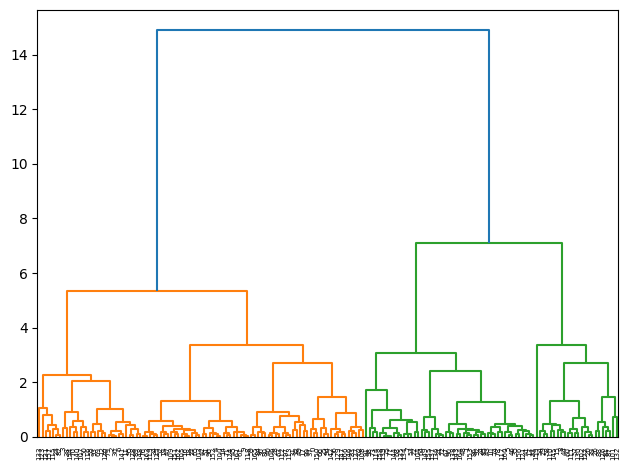

In [71]:
linkage_data = linkage(m2, method="ward", metric="euclidean")
dendrogram(linkage_data)
plt.tight_layout()
plt.show()

- Trong trường hợp này, cần chia các quốc gia thành 4 nhóm, vì vậy sẽ chọn trực tiếp 4 cụm. Phân tích dendrogram cho tập dữ liệu này khá dư thừa.  
- Ở đây, một lần nữa có thể thấy 2 **đường màu xanh** cùng với 2 **đường màu cam** là các cụm cuối cùng được tạo ra trước khi kết nối với nhau.  
- Dendrogram có 4 nhánh, cho thấy **4 cụm** được tạo ra trước khi hợp nhất thành 1

In [72]:
from sklearn.cluster import AgglomerativeClustering

hierarchical_cluster = AgglomerativeClustering(
    n_clusters=4, linkage="ward", metric="euclidean"
)
labels = hierarchical_cluster.fit(m2)

pred_agc = pd.Series(hierarchical_cluster.labels_)
data["Class"] = pred_agc
pca_df2["Class"] = pred_agc

In [73]:
pca_df2

,Country,0,1,2,Class
0,Afghanistan,0.22,0.64,0.09,0
1,Albania,-0.08,-0.17,-0.21,2
2,Algeria,-0.96,-0.13,-0.13,3
3,Angola,-1.51,0.47,0.28,3
4,Antigua and Barbuda,-0.26,-0.24,-0.06,0
...,...,...,...,...,...
162,Vanuatu,-0.58,0.09,-0.02,0
163,Venezuela,-0.69,-0.15,-0.17,0
164,Vietnam,0.01,-0.12,-0.02,2
165,Yemen,-0.63,0.26,-0.02,0


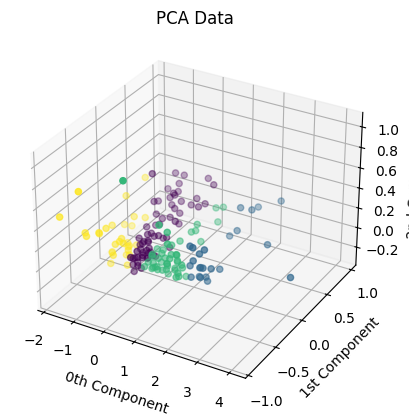

In [74]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
x = np.array(pca_df2[0])
y = np.array(pca_df2[1])
z = np.array(pca_df2[2])
ax.scatter(x,y,z,c = pca_df2['Class'])
plt.title('PCA Data')
ax.set_xlabel('0th Component')
ax.set_ylabel('1st Component')
ax.set_zlabel('2nd Component')
plt.show();

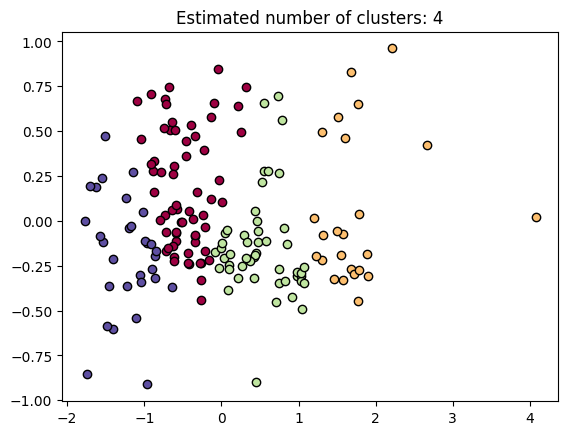

In [75]:
# plot result of hierarchical clustering with 3 clusters in 2D by ditribution of child_mort and income with scatter plot

unique_labels = set(pred_agc)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    class_member_mask = pred_agc == k
    xy = m2[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col), markeredgecolor="k")
    
plt.title("Estimated number of clusters: %d" % 4)
plt.show()




- Đã có các cụm nhưng chưa biết giá trị nào tương ứng với cụm nào
- Vì vậy, vẽ các boxplot của **income** và **child_mort** theo các cụm đã được gán nhãn.  
- Biết rằng **thu nhập thấp và tỷ lệ tử vong trẻ em cao** là dấu hiệu của **quốc gia kém phát triển về kinh tế**.  

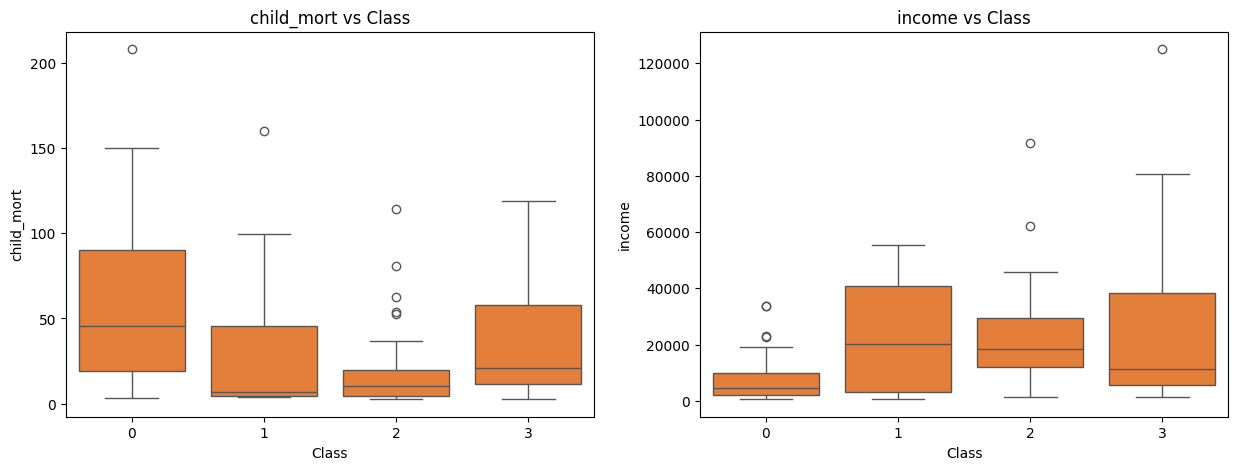

In [76]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="Class", y="child_mort", data=data, color="#FF781F")
plt.title("child_mort vs Class")

plt.subplot(1, 2, 2)
sns.boxplot(x="Class", y="income", data=data, color="#FF781F")
plt.title("income vs Class")

plt.show()

- From the above plot we can conclude :
    - **0 : Help Needed**
    - **2 : Might Need Help**
    - **1, 3 : No Help Needed**

In [77]:
pca_df2["Class"].loc[pca_df2["Class"] == 0] = "Help Needed"
pca_df2["Class"].loc[pca_df2["Class"] == 2] = "Might Need Help"
pca_df2["Class"].loc[pca_df2["Class"] == 1] = "No Help Needed"
pca_df2["Class"].loc[pca_df2["Class"] == 3] = "No Help Needed"

fig = px.choropleth(
    pca_df2[["Country", "Class"]],
    locationmode="country names",
    locations="Country",
    title="Needed Help Per Country (World)",
    color=pca_df2["Class"],
    color_discrete_map={
        "Help Needed": "Red",
        "Might Need Help": "Yellow",
        "No Help Needed": "Green",
    },
)
fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(
    legend_title_text="Labels", legend_title_side="top", title_pad_l=260, title_y=0.86
)
fig.show(engine="kaleido")

In [78]:
print(silhouette_score(m2, pred_agc, metric="euclidean"))

0.3401384811341626


In [82]:
data_4 = pca_df2['Class'].value_counts().to_dict()
data_4['Noise / Outliers'] = 0
res.append(data_4)
res

[{'Might Need Help': 84,
  'Noise / Outliers': 67,
  'Help Needed': 8,
  'No Help Needed': 8},
 {'Noise / Outliers': 94,
  'Help Needed': 39,
  'Might Need Help': 25,
  'No Help Needed': 9},
 {'Might Need Help': 83,
  'No Help Needed': 49,
  'Help Needed': 35,
  'Noise / Outliers': 0},
 {'Help Needed': 64,
  'No Help Needed': 54,
  'Might Need Help': 49,
  'Noise / Outliers': 0}]

In [83]:
df_res = pd.DataFrame(res, index=['DBSCAN_Feature_Combination', 'DBSCAN_PCA', 'Hierarchical_Feature_Combination', 'Hierarchical_PCA'])
df_res


,Might Need Help,Noise / Outliers,Help Needed,No Help Needed
DBSCAN_Feature_Combination,84,67,8,8
DBSCAN_PCA,25,94,39,9
Hierarchical_Feature_Combination,83,0,35,49
Hierarchical_PCA,49,0,64,54


# Kết luận

- Tập dữ liệu sạch.  

- EDA 

- Feature Combination và PCA

- **K-Means Clustering**, **Hierarchical Clustering** và **DBSCAN Clustering**
- Hierarchical_PCA – Tốt nhất: Silhouette Score cao nhất (0.3401), cụm chặt chẽ, phân bố đều, không có noise.
- Hierarchical_Feature_Combination – Tốt nhưng chưa cân bằng cụm bằng Hierarchical_PCA.
- DBSCAN_Feature_Combination – Nhiều điểm nhiễu, cụm không cân bằng.
- DBSCAN_PCA – Kém nhất: Silhouette Score âm, cụm kém chất lượng.